-----------------------------------------
organic
-----------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
--------

C:\Users\jkrob\AppData\Local\Temp\ipykernel_29288\809369320.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = figureSize)


-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-----------------------------------------
gm_late
-----------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
--------

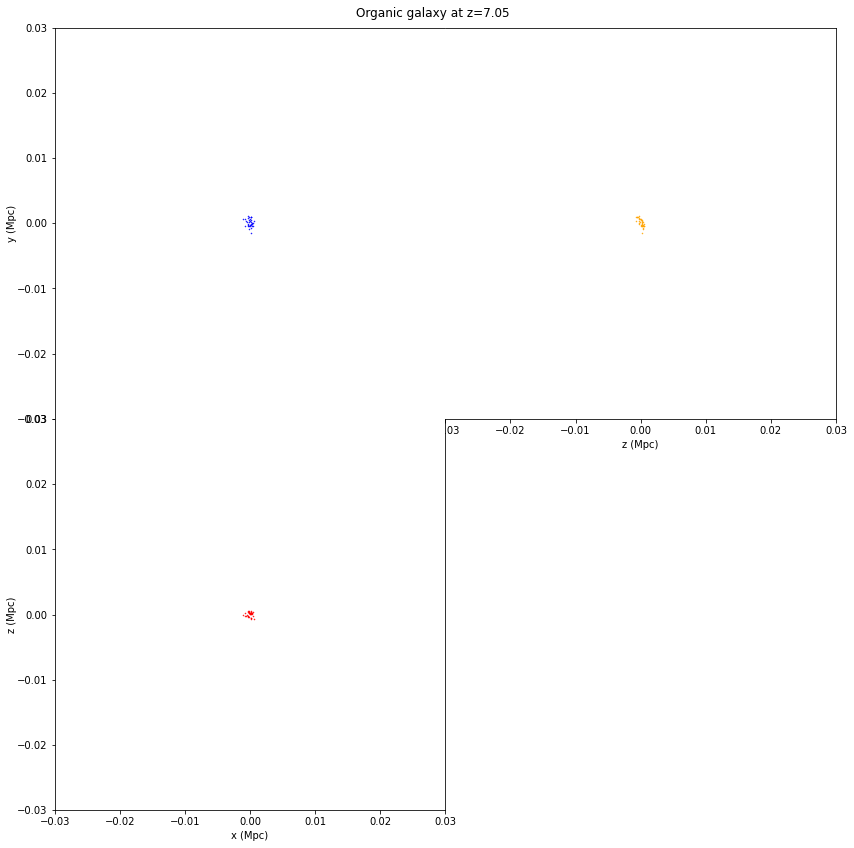

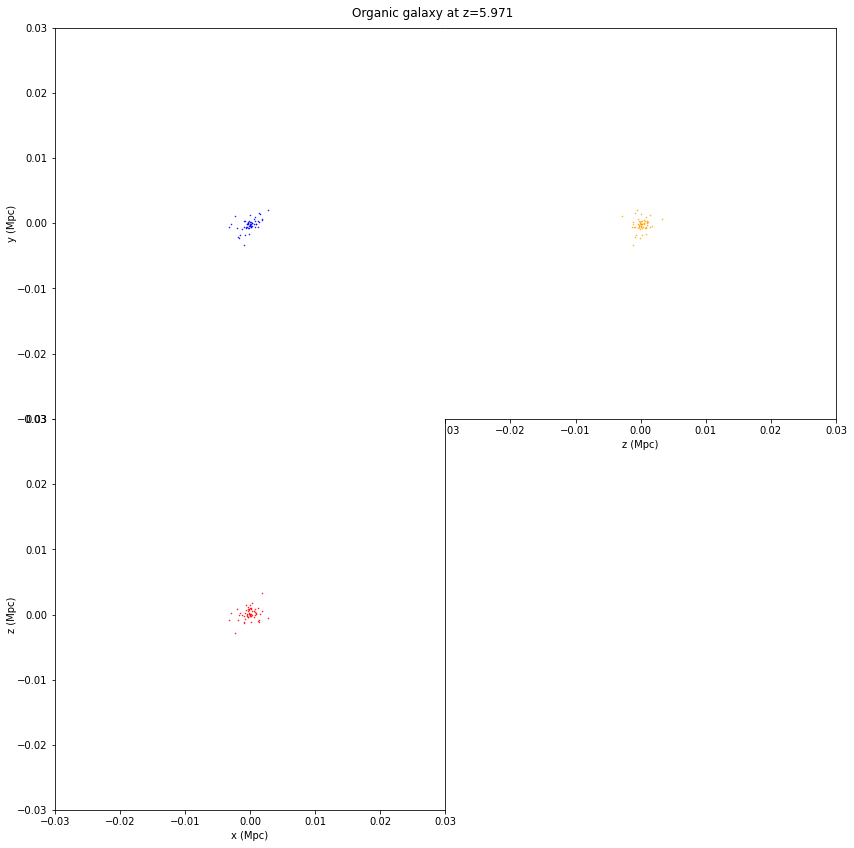

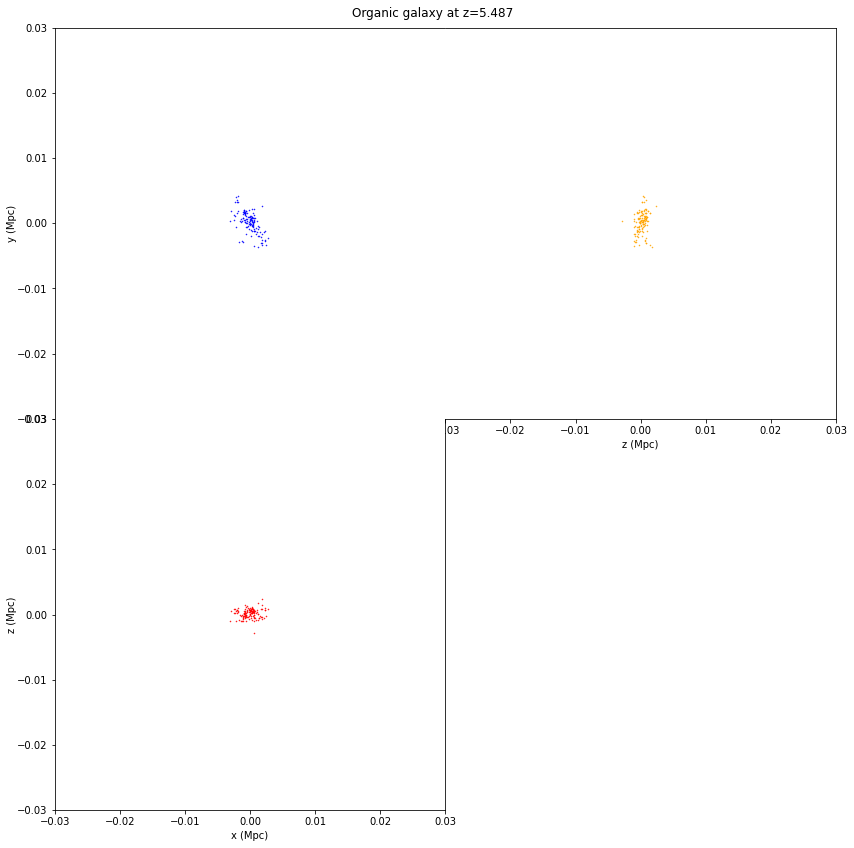

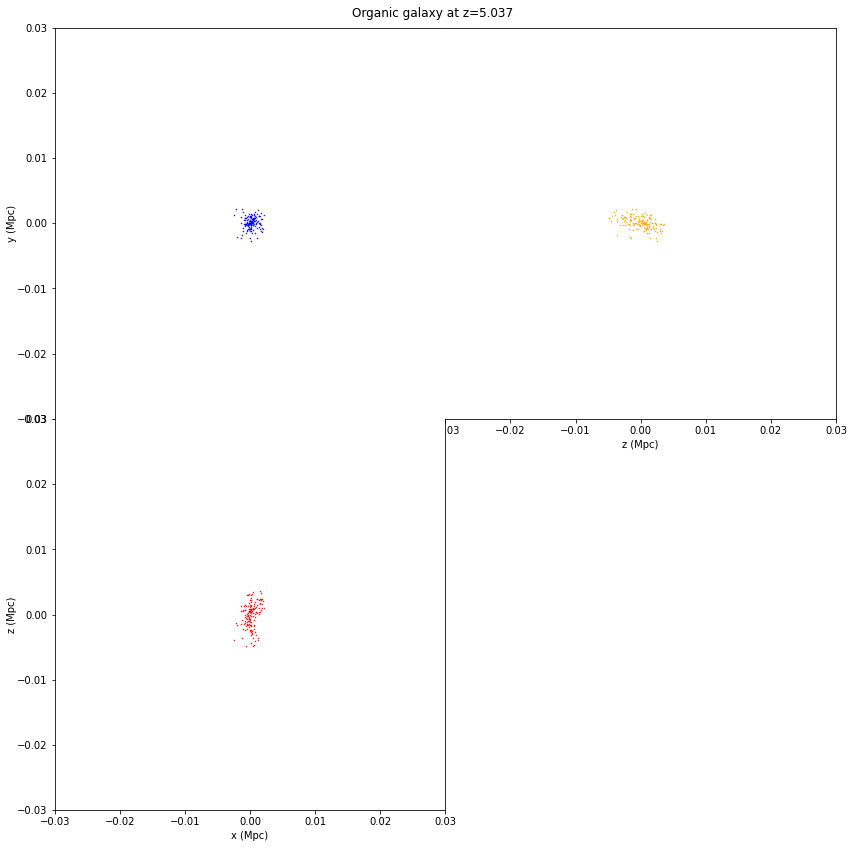

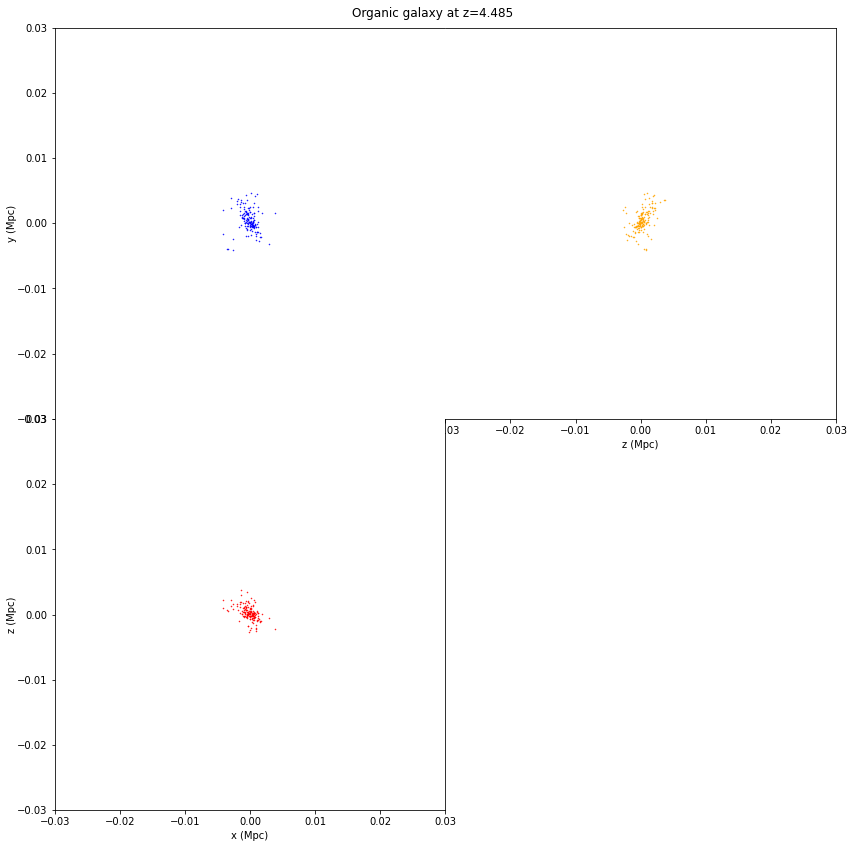

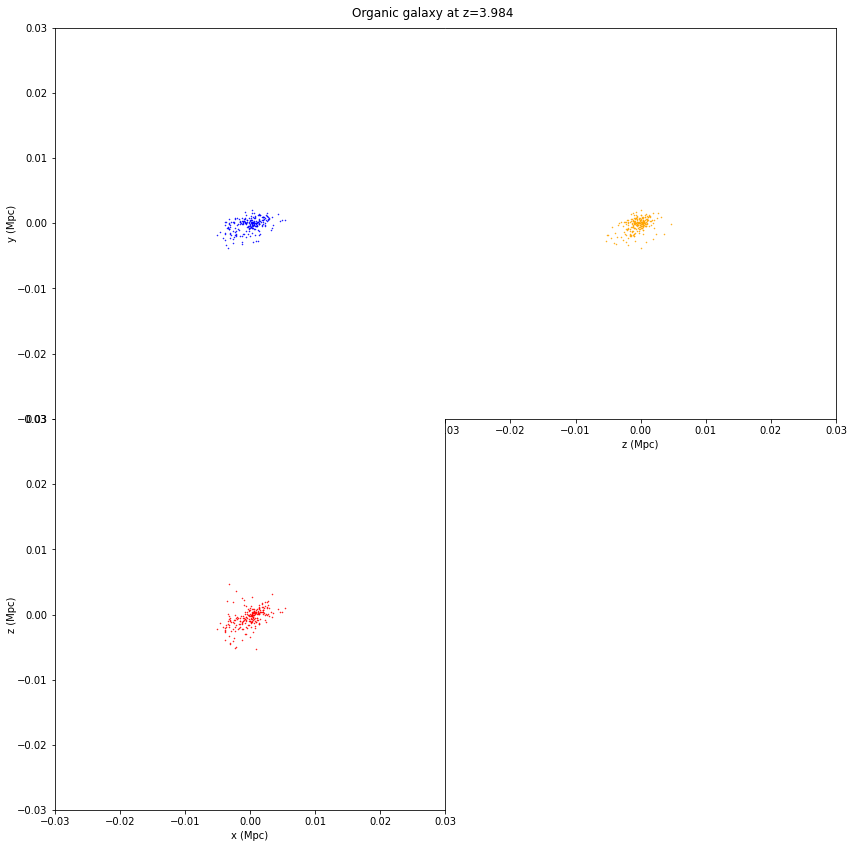

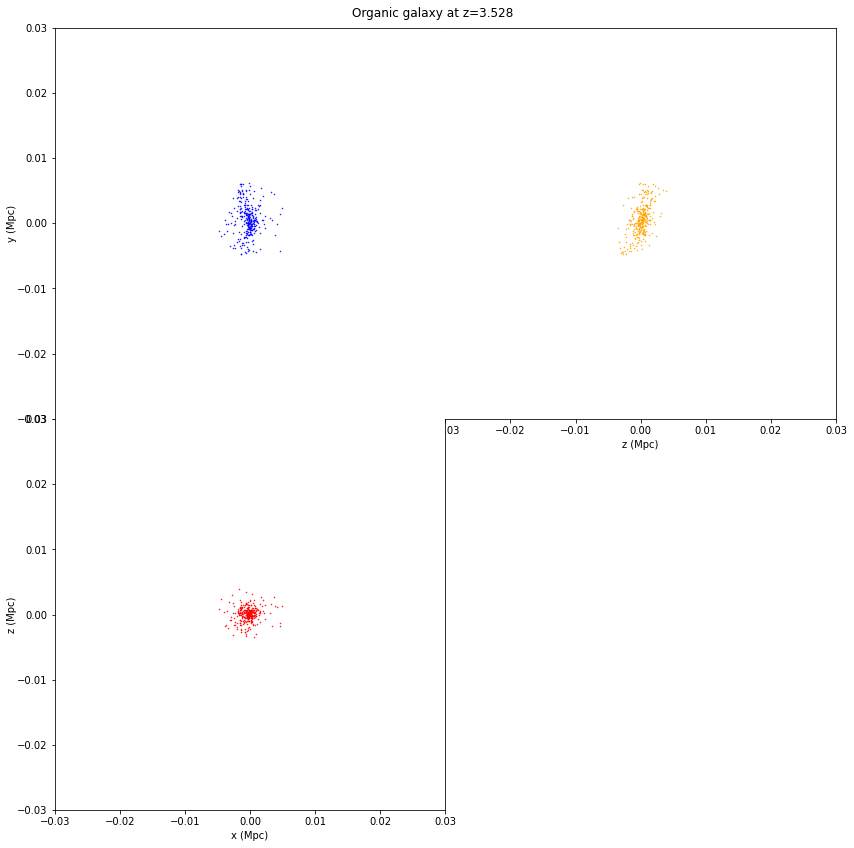

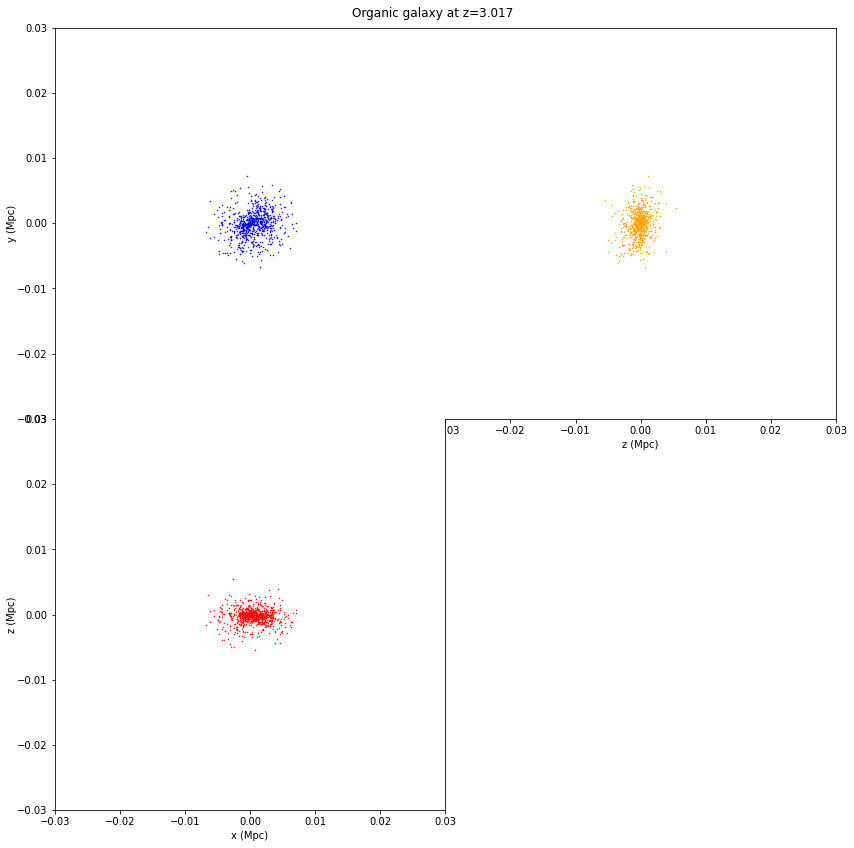

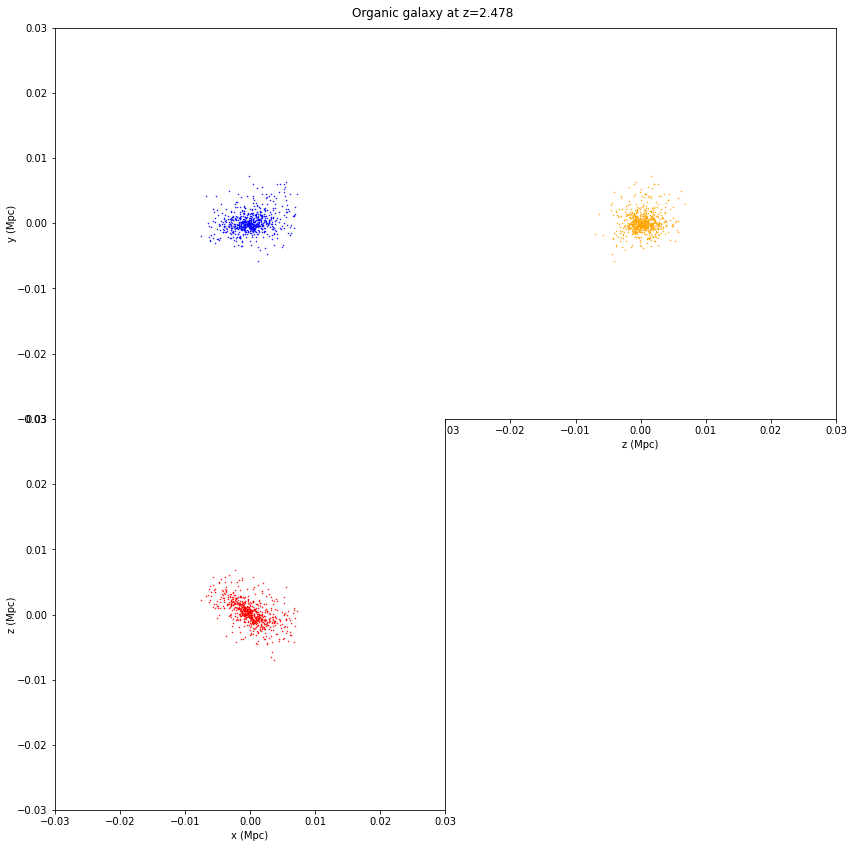

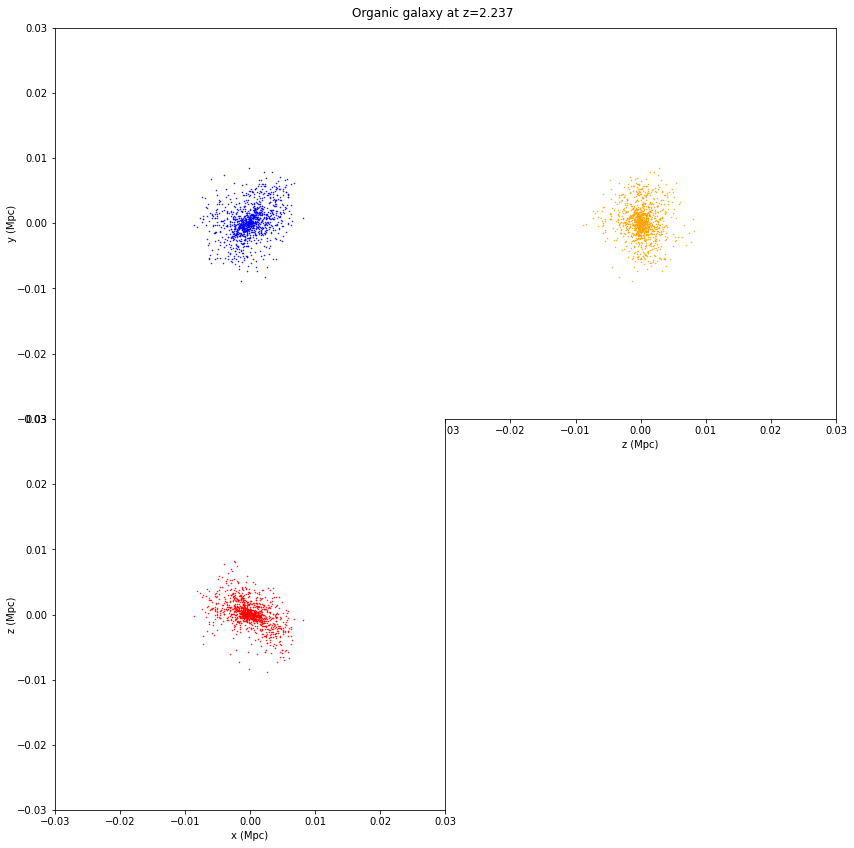

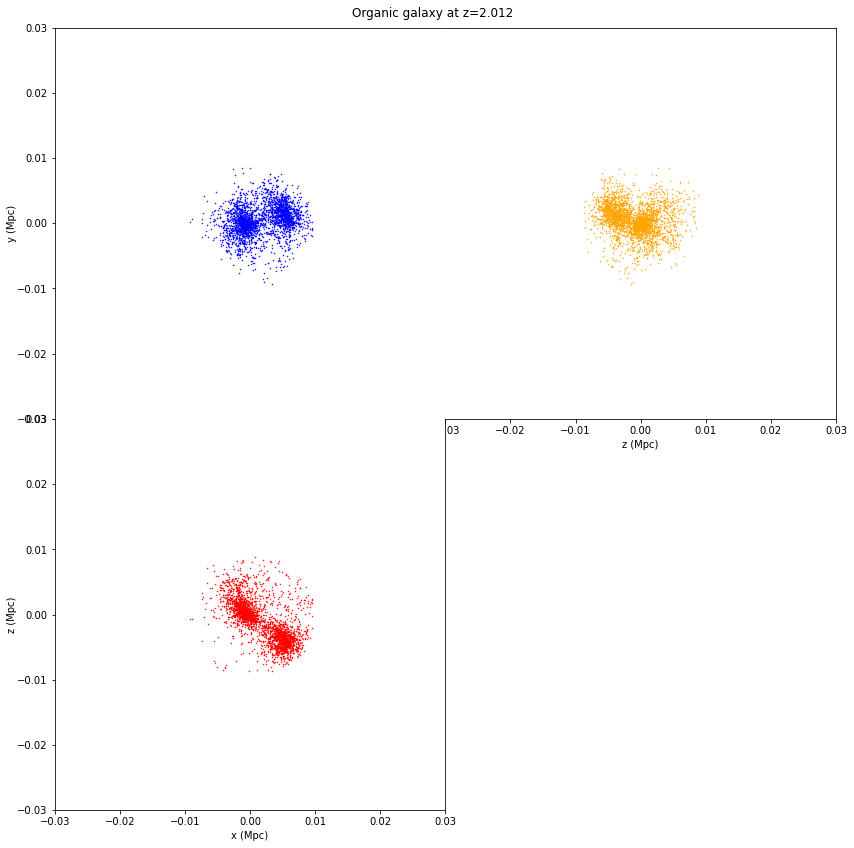

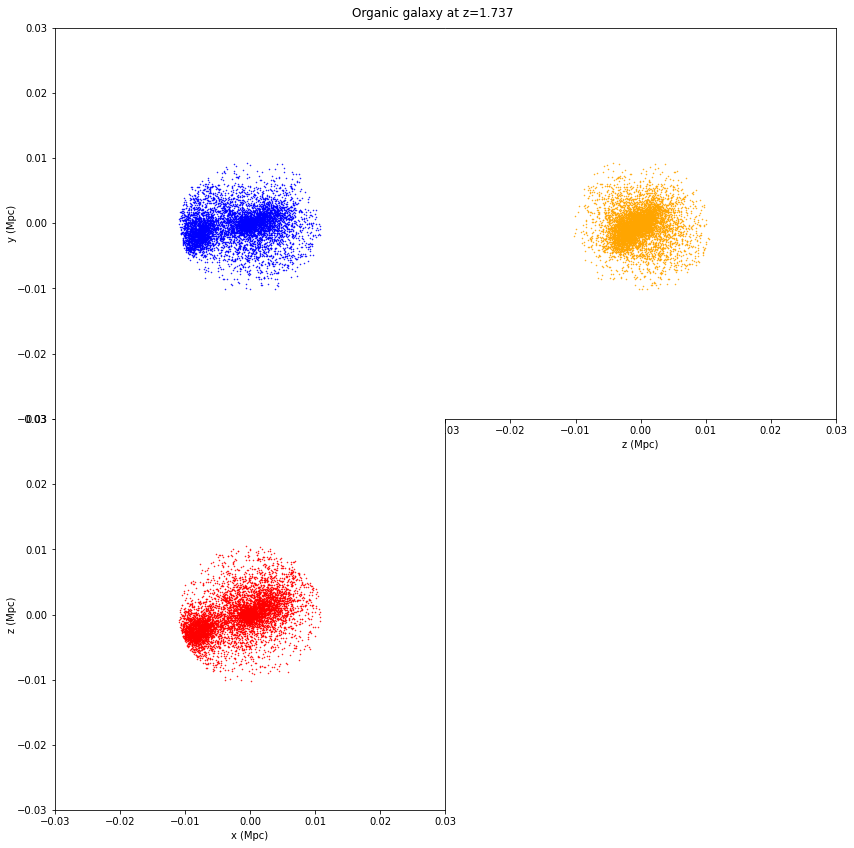

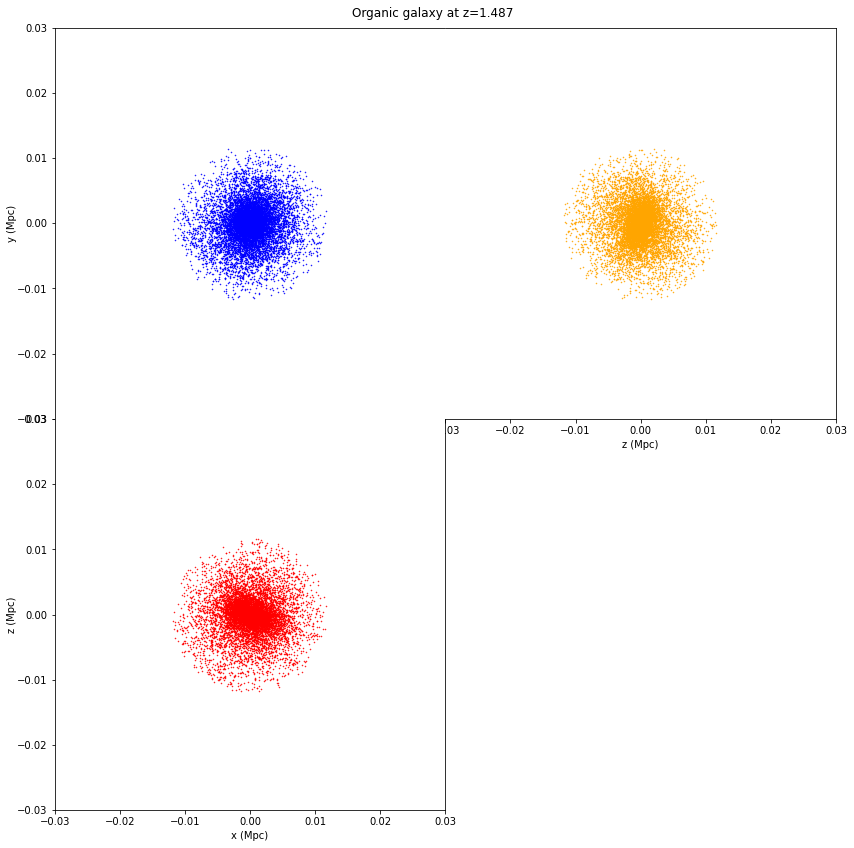

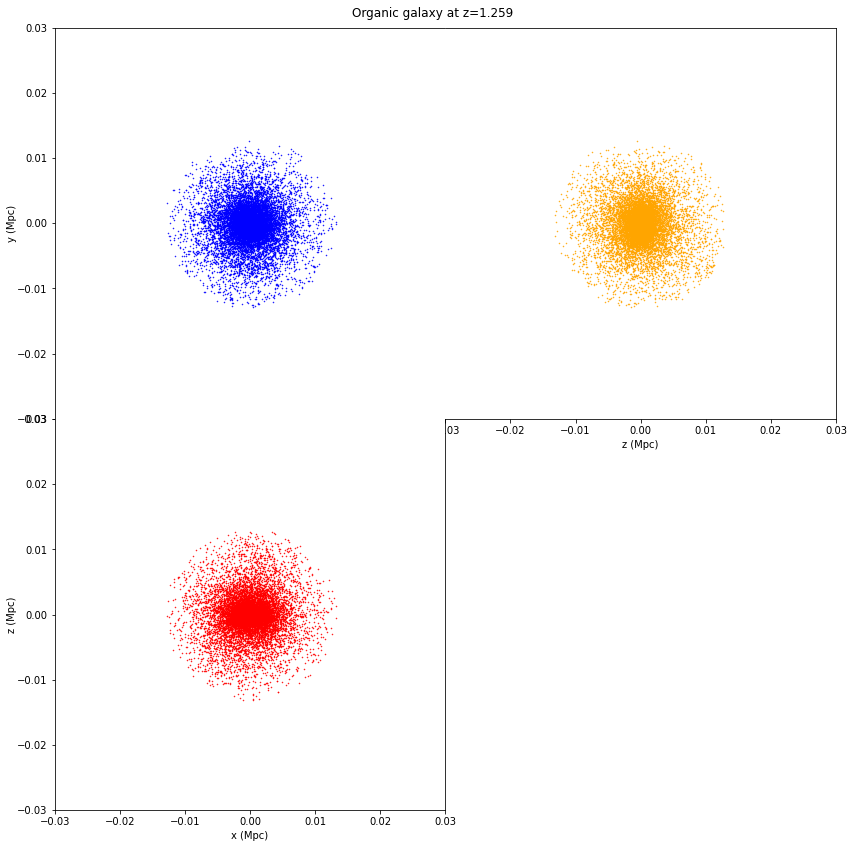

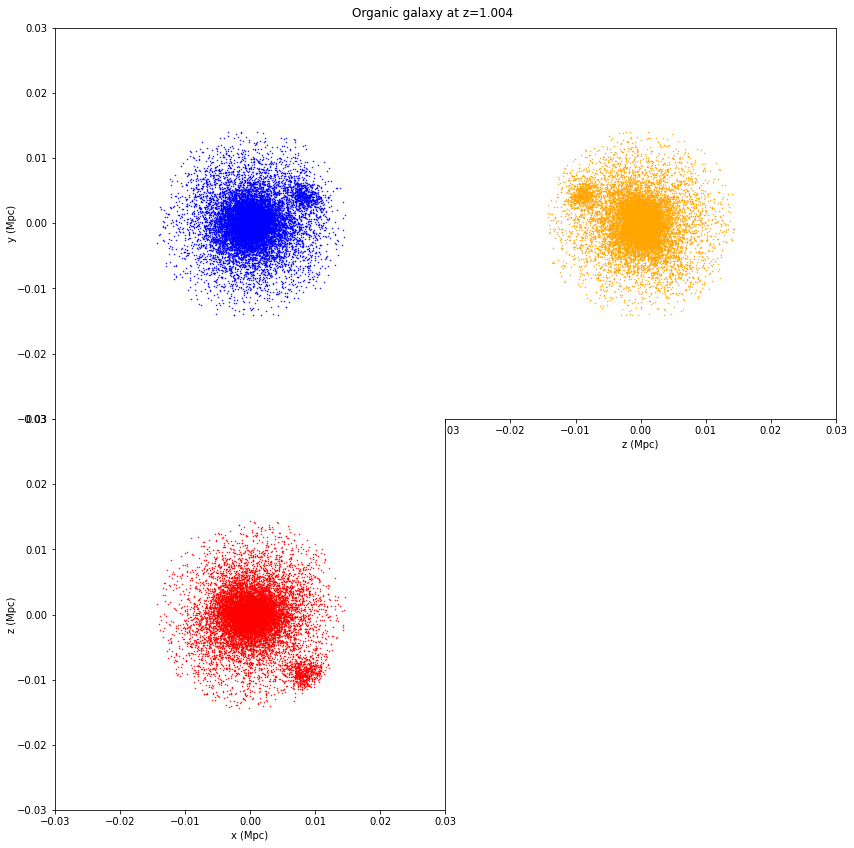

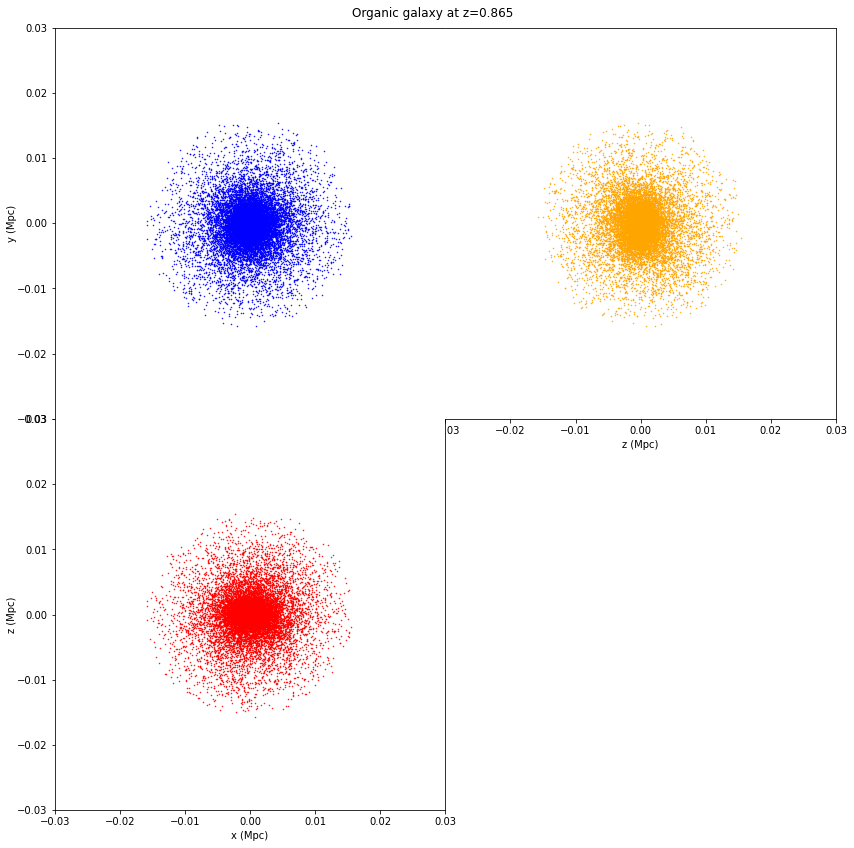

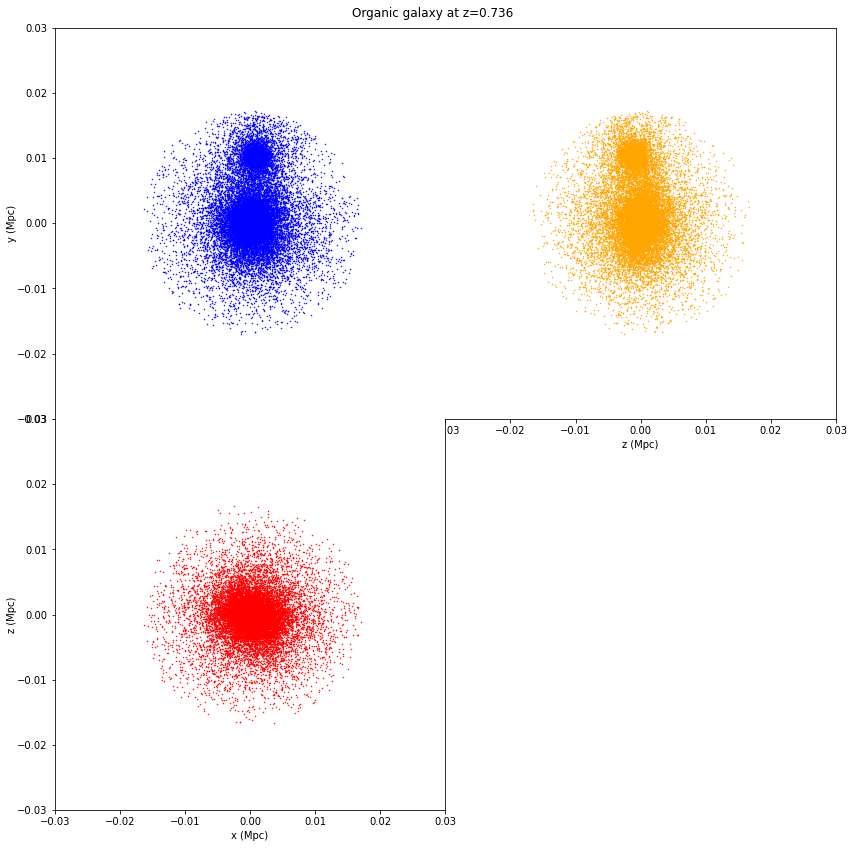

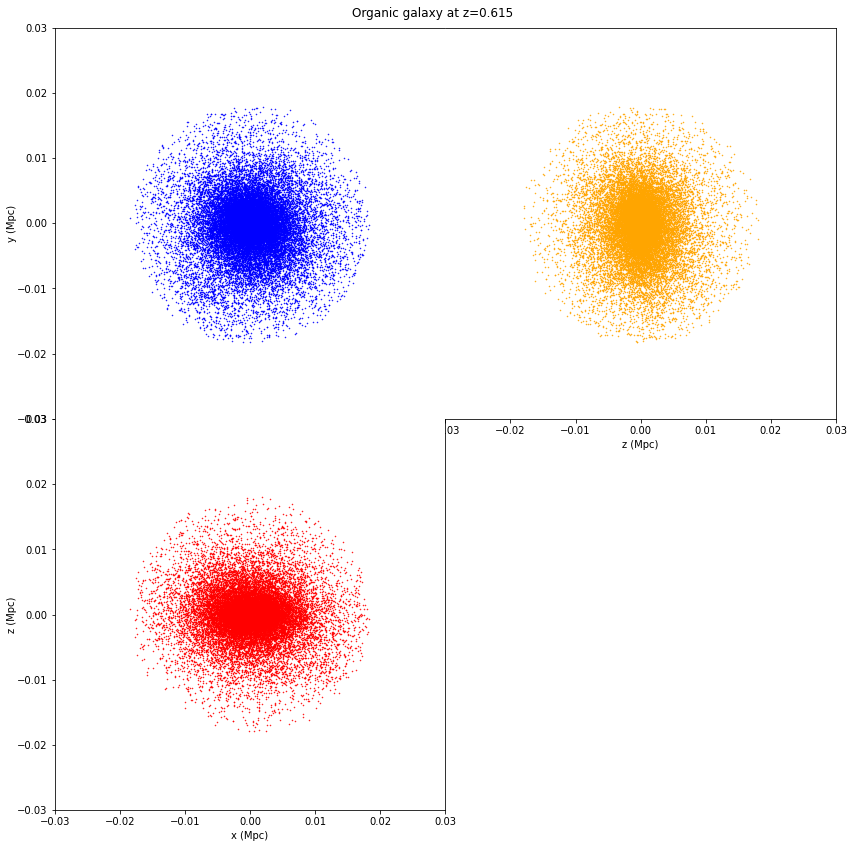

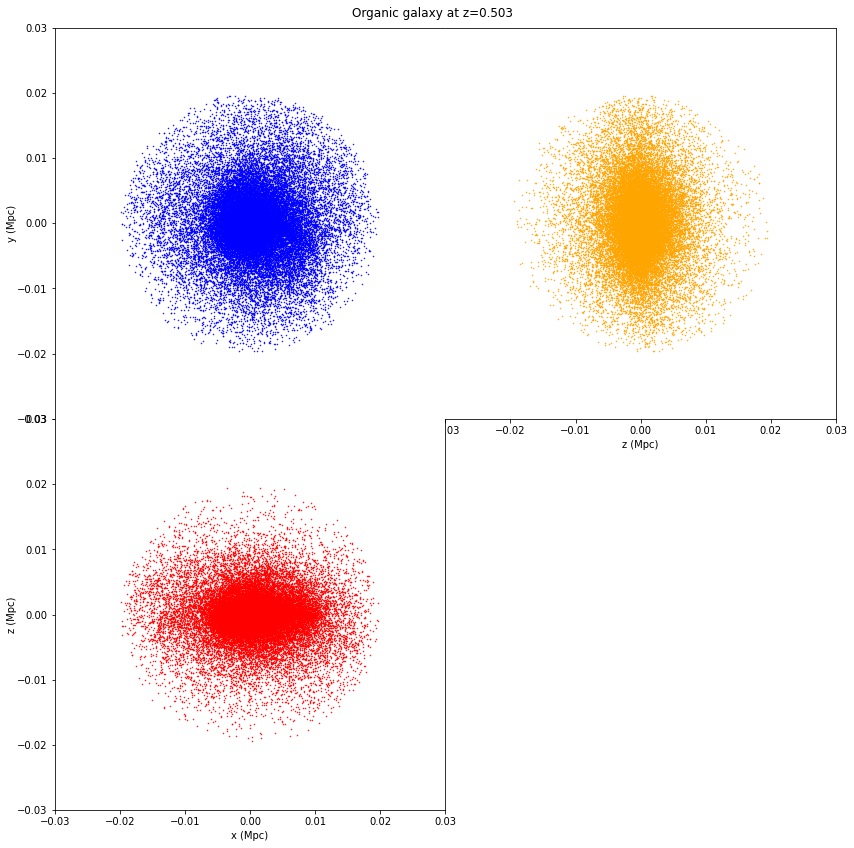

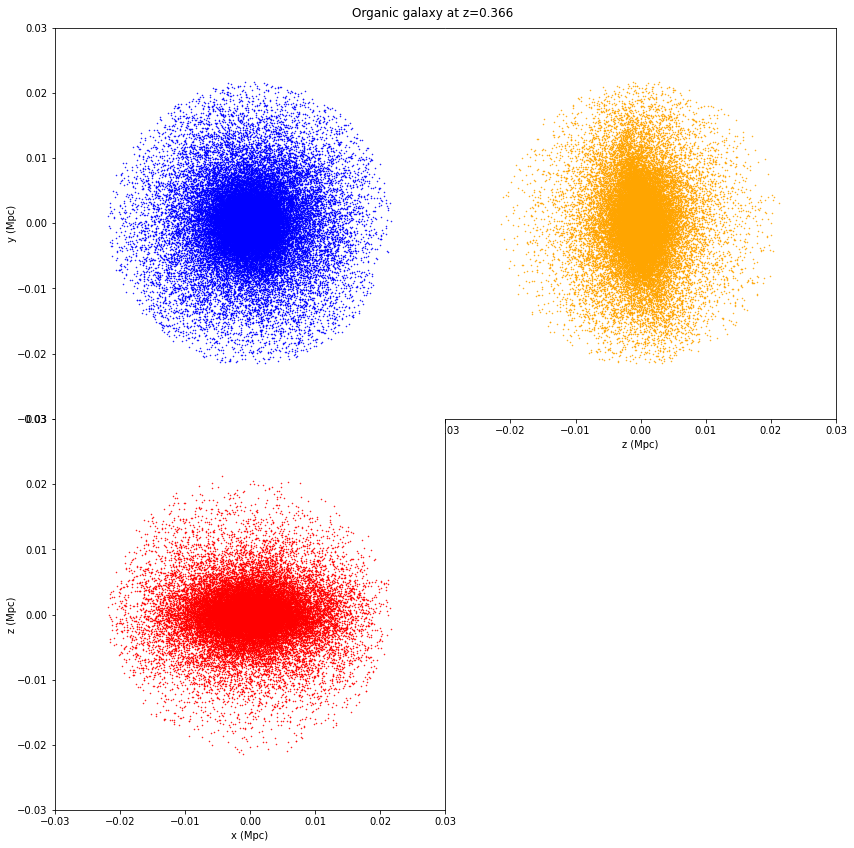

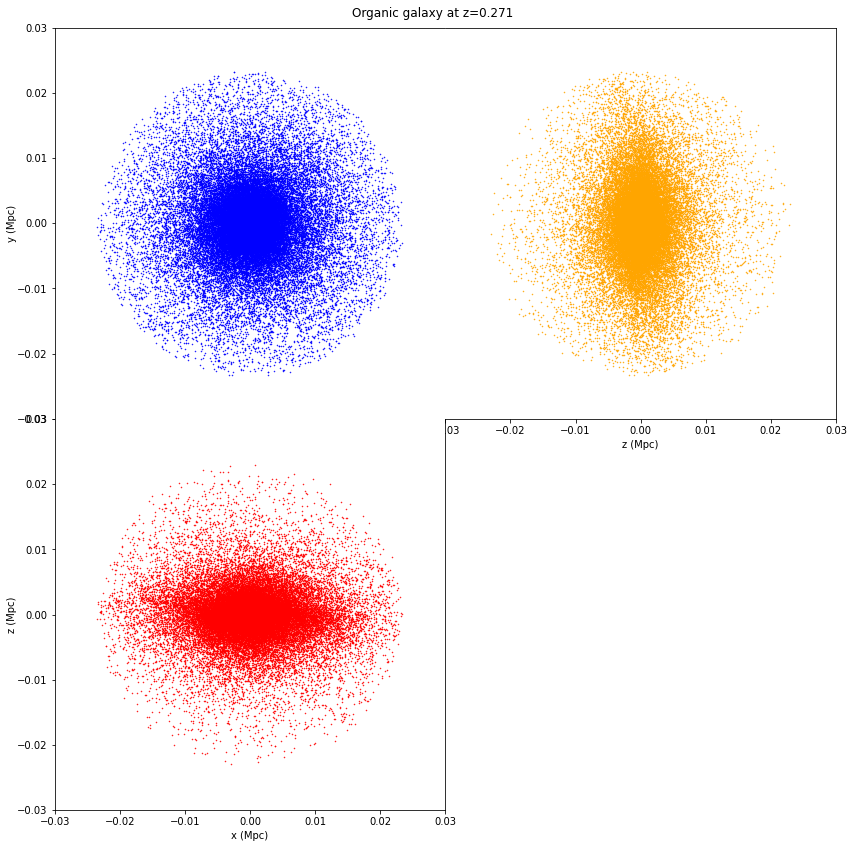

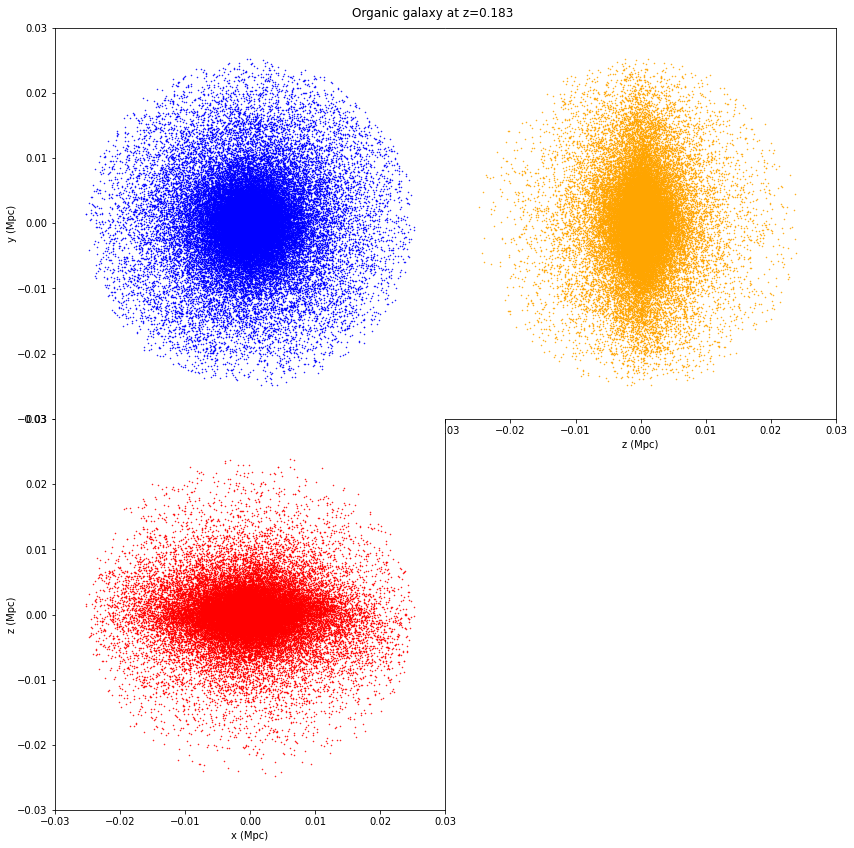

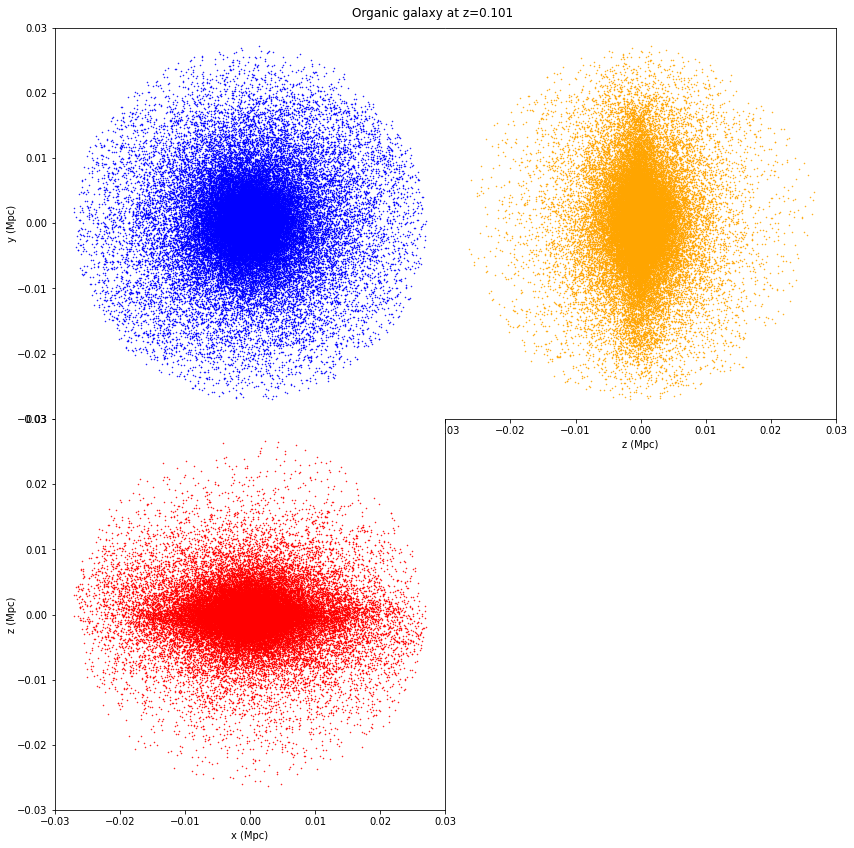

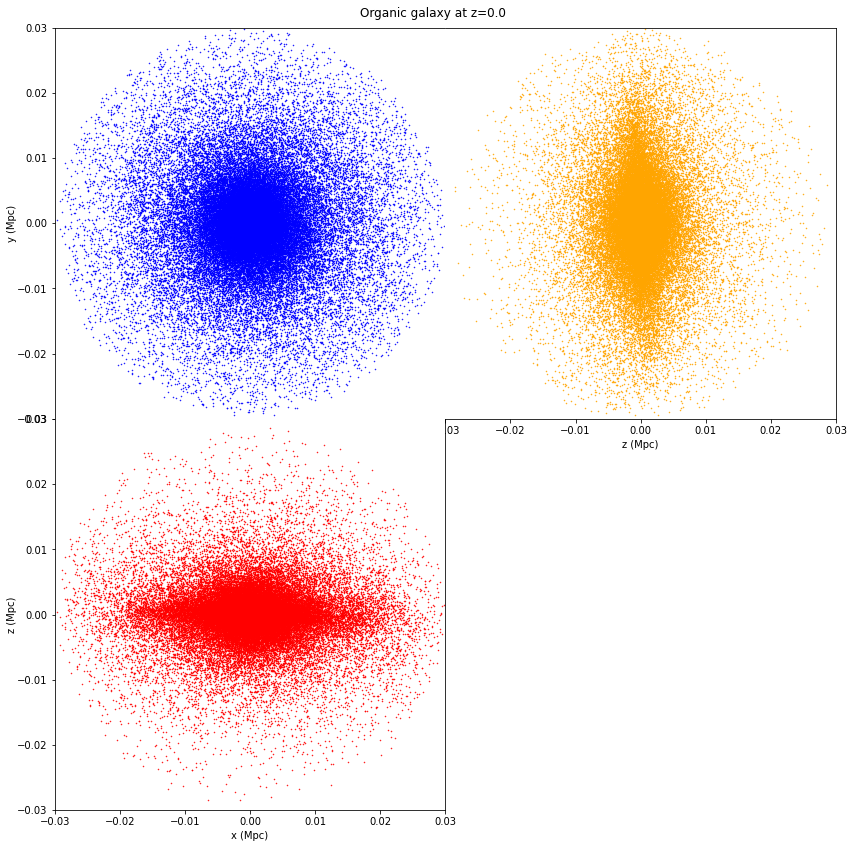

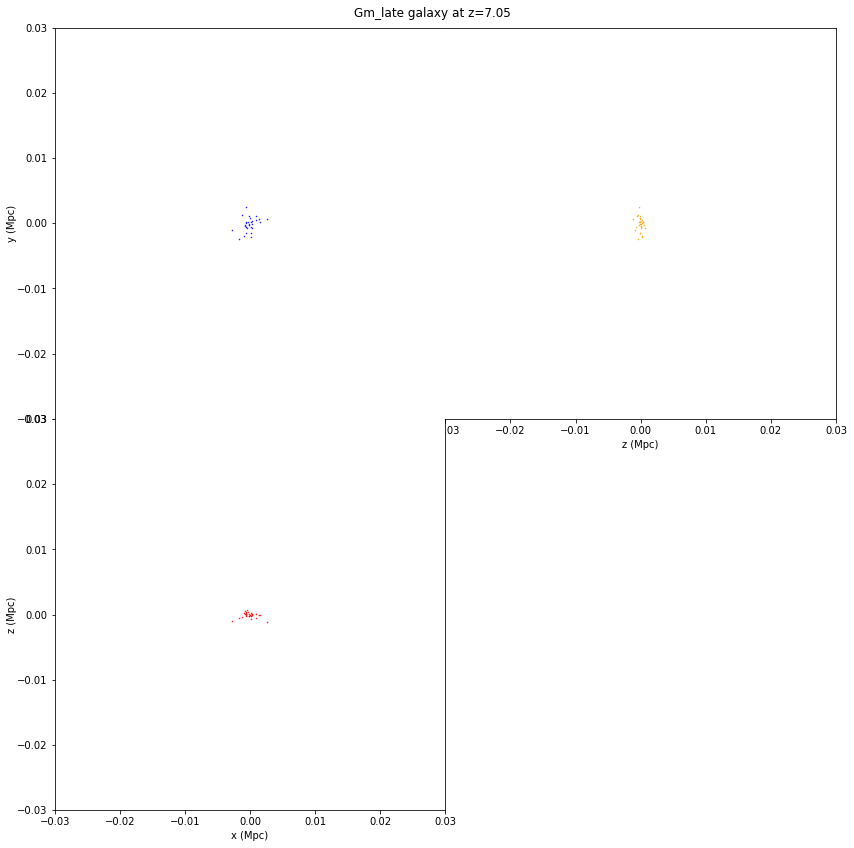

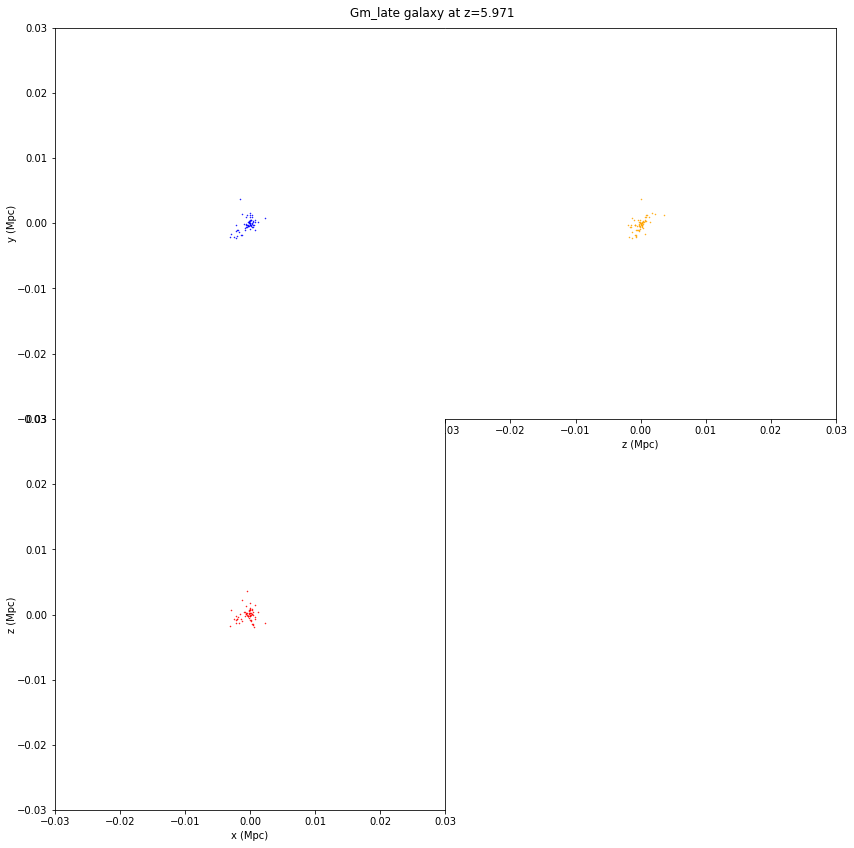

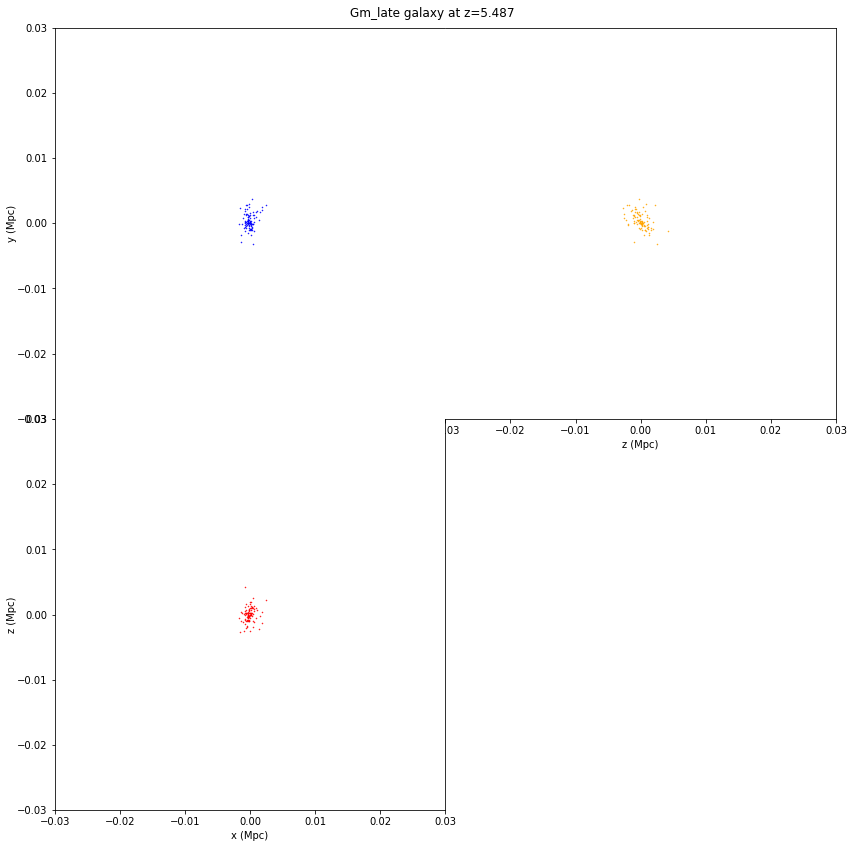

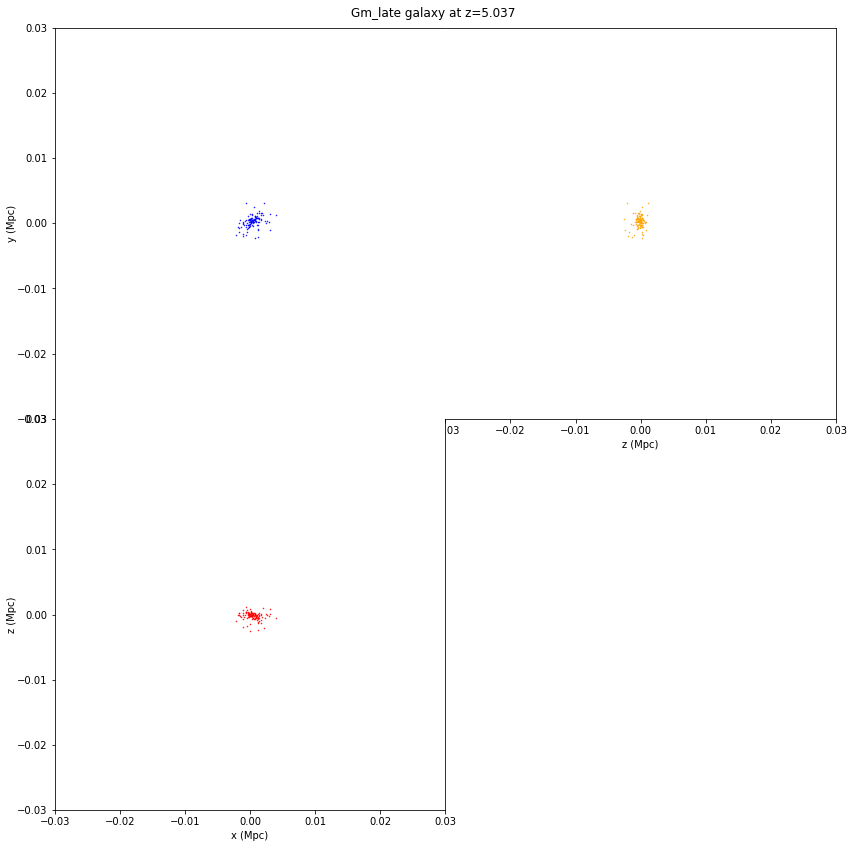

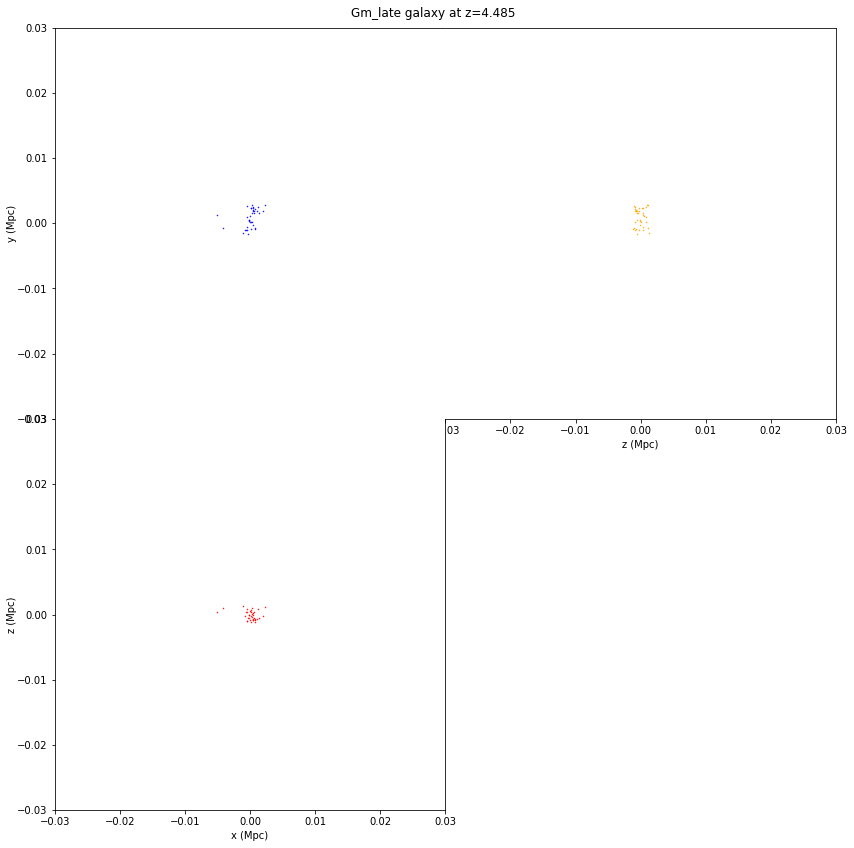

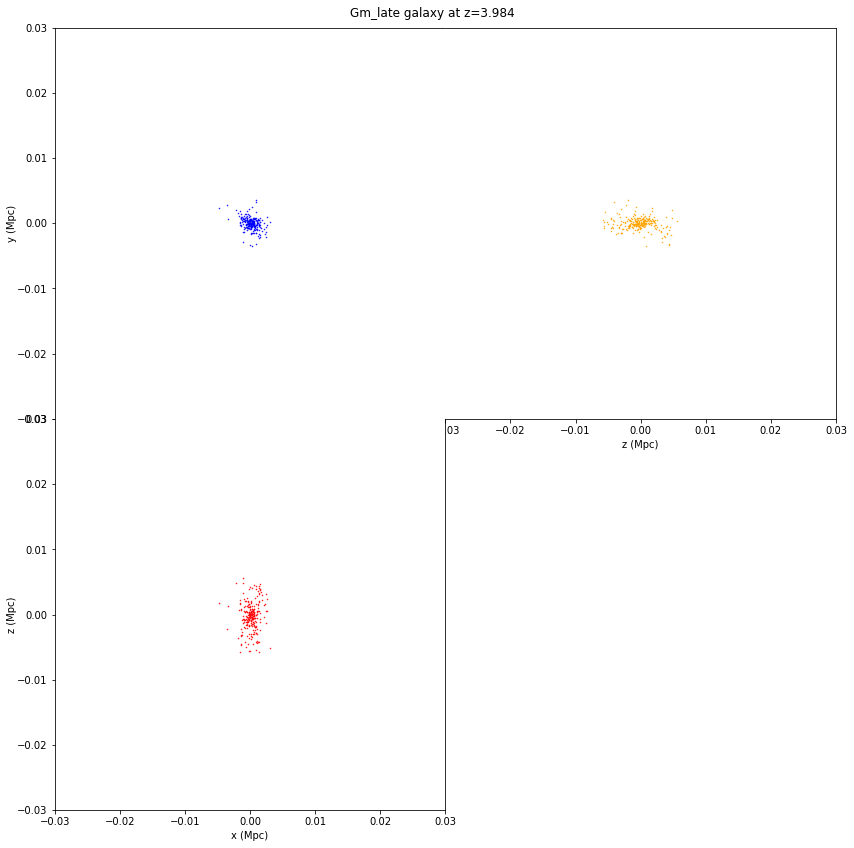

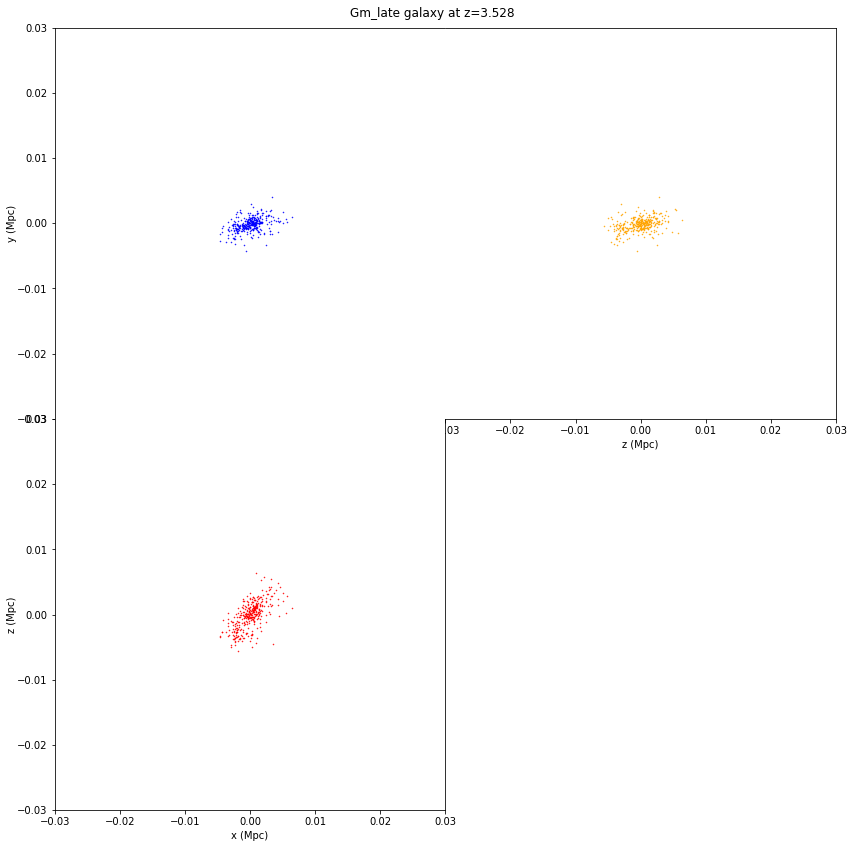

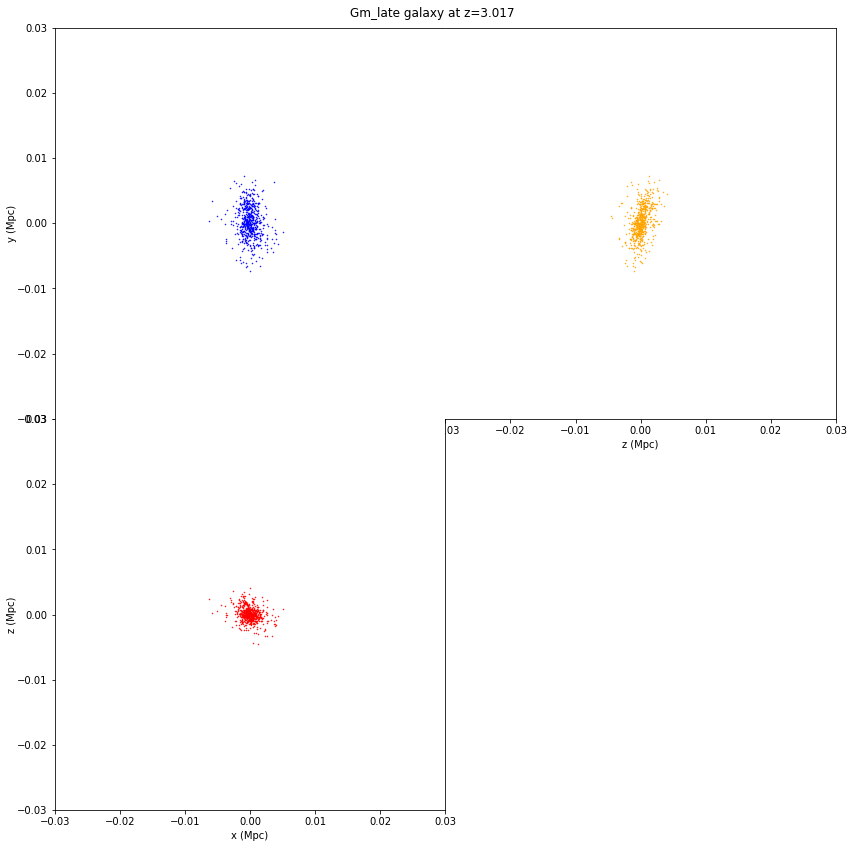

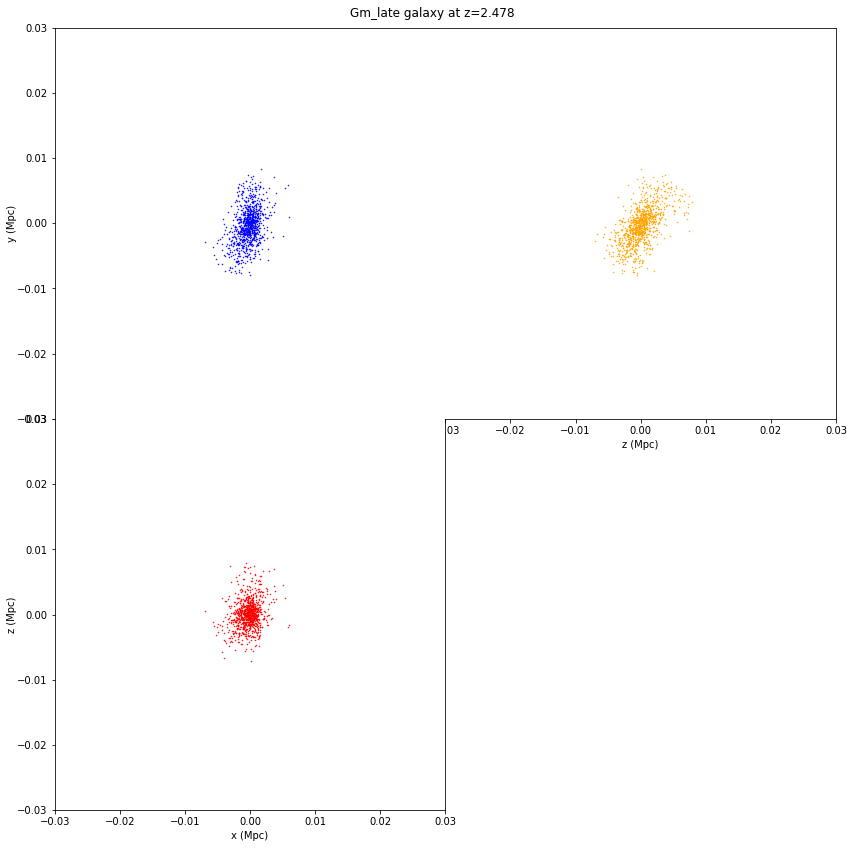

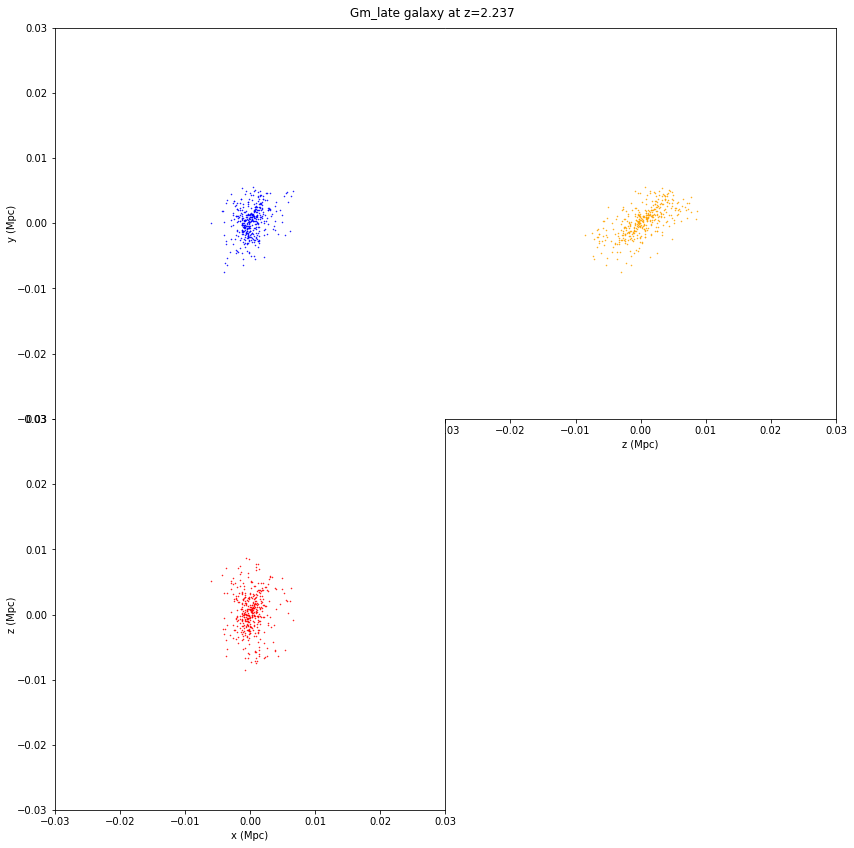

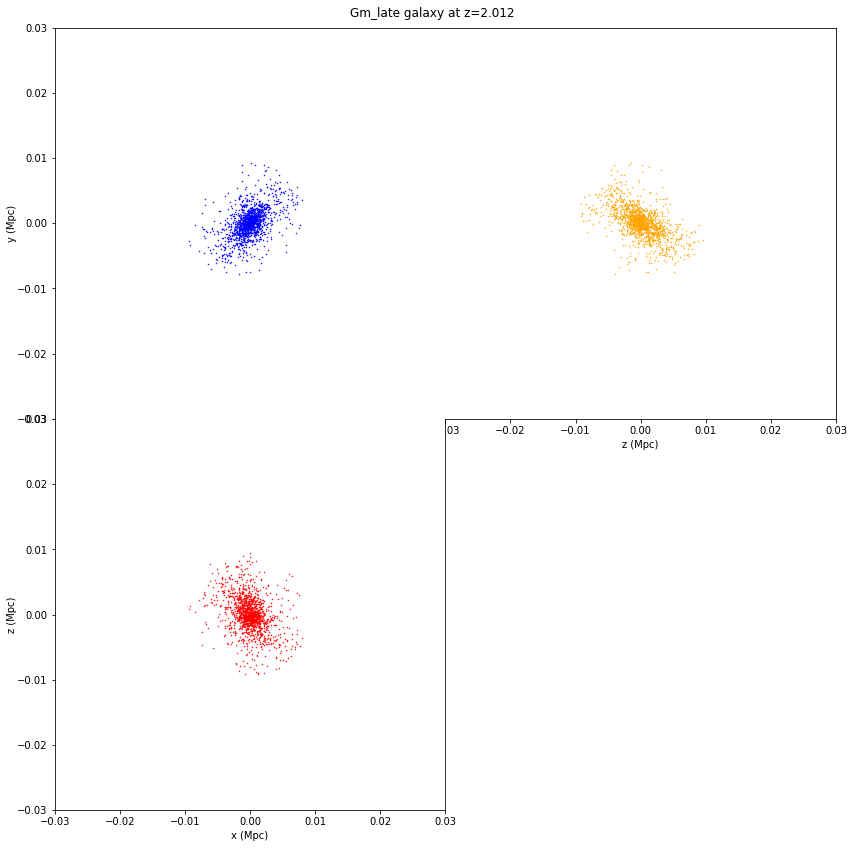

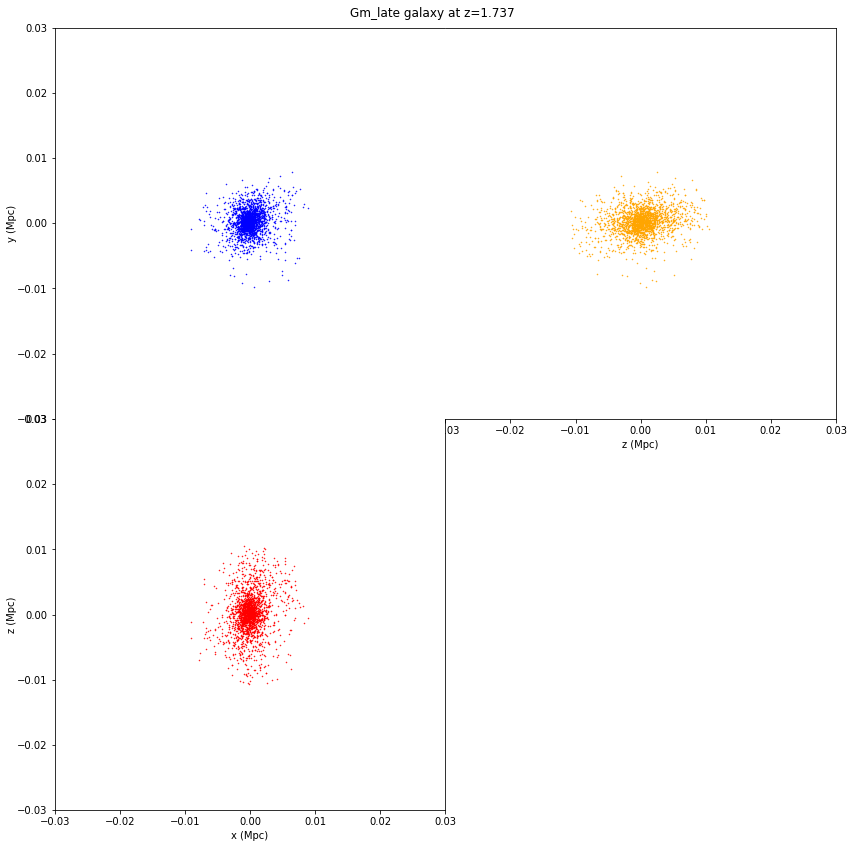

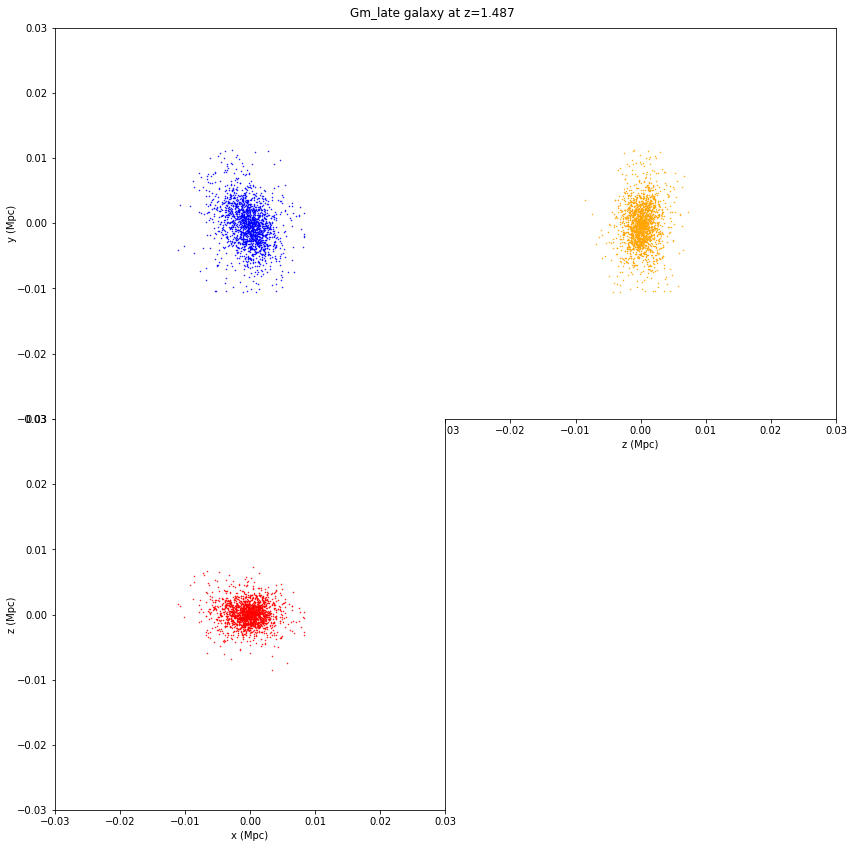

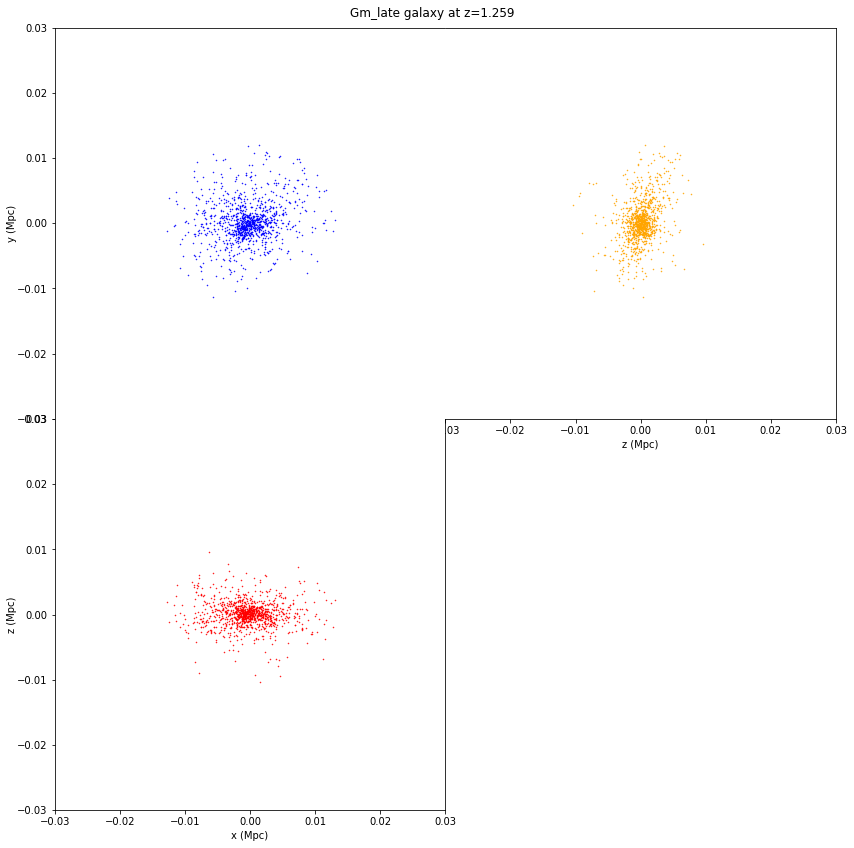

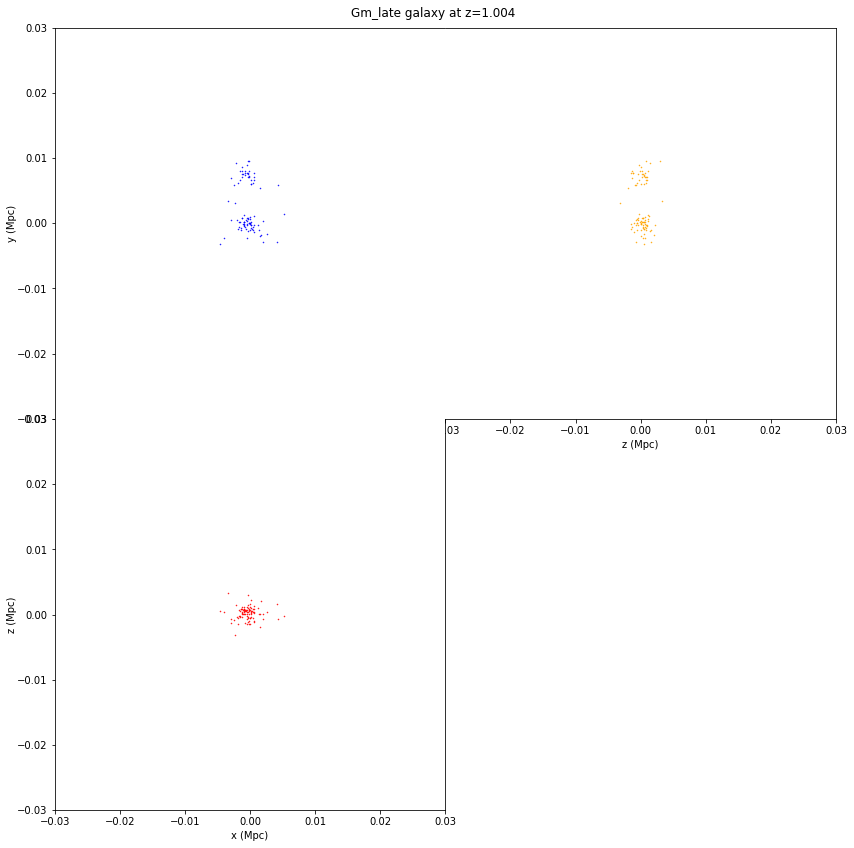

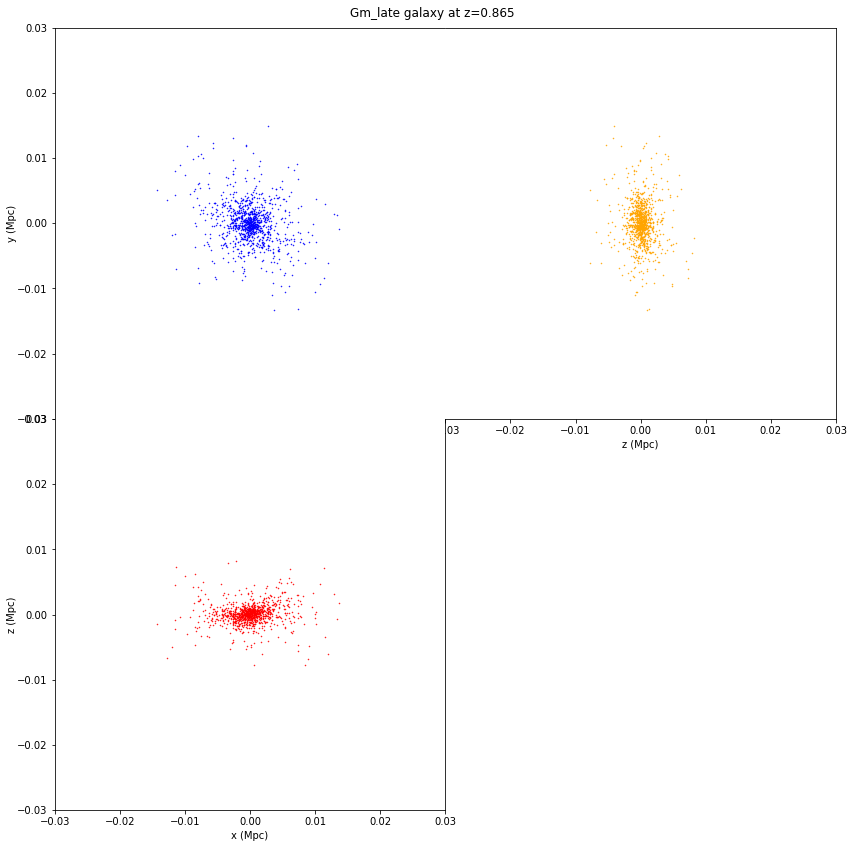

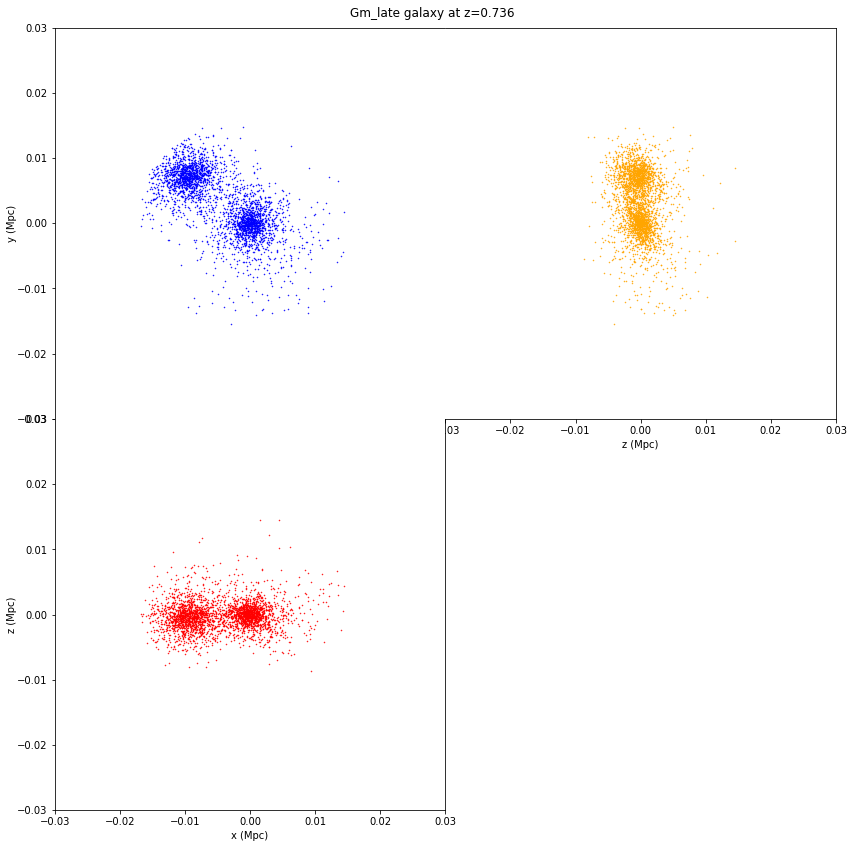

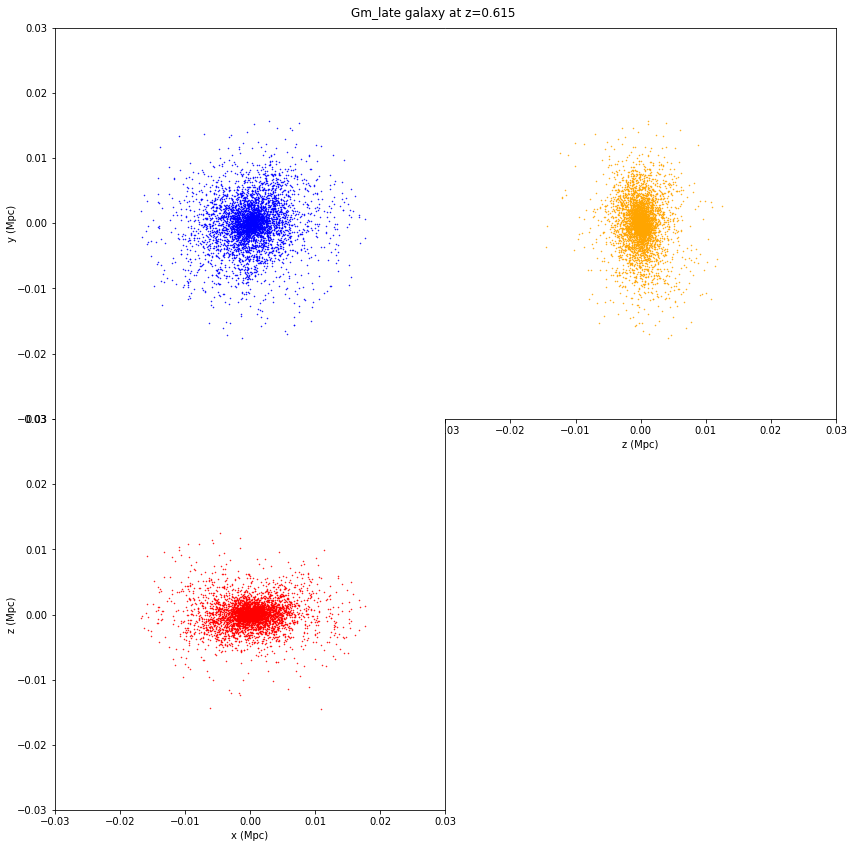

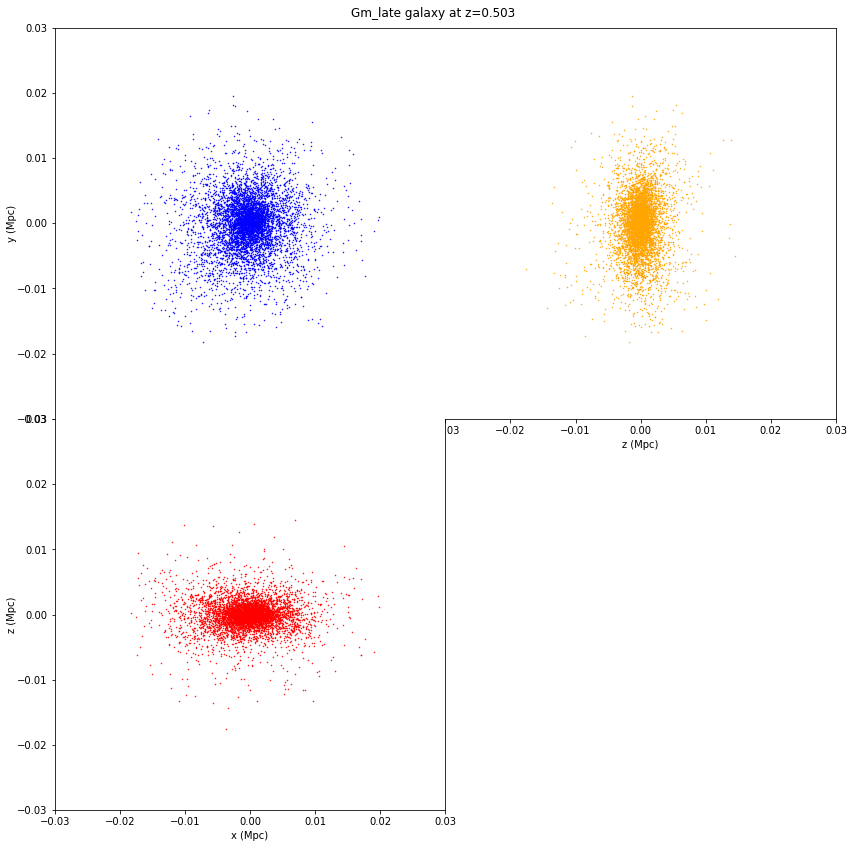

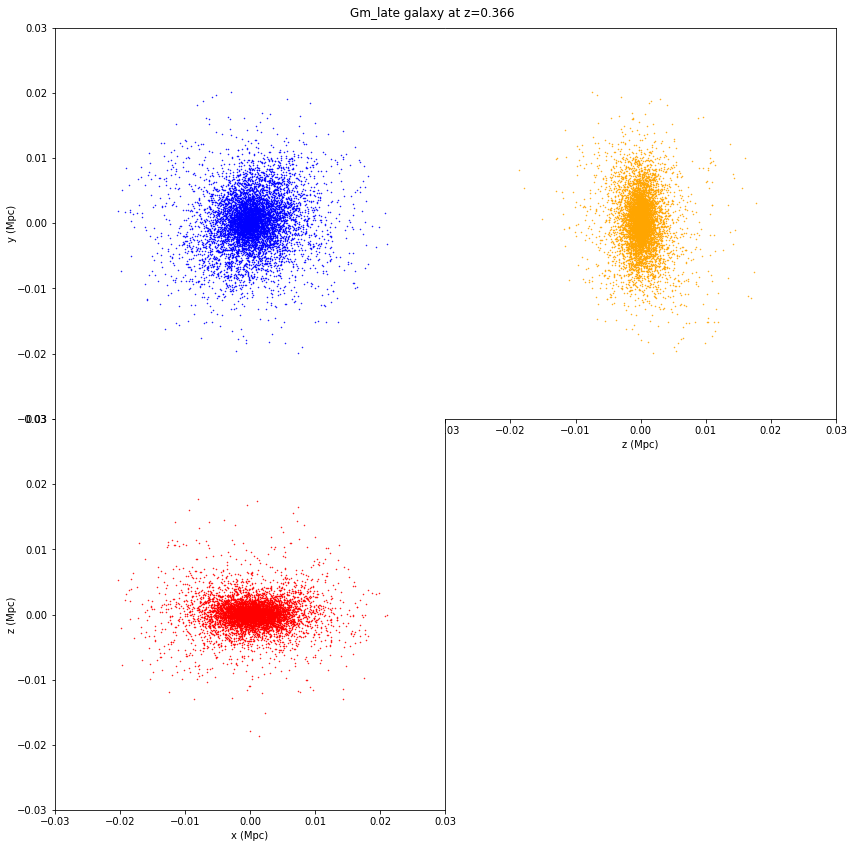

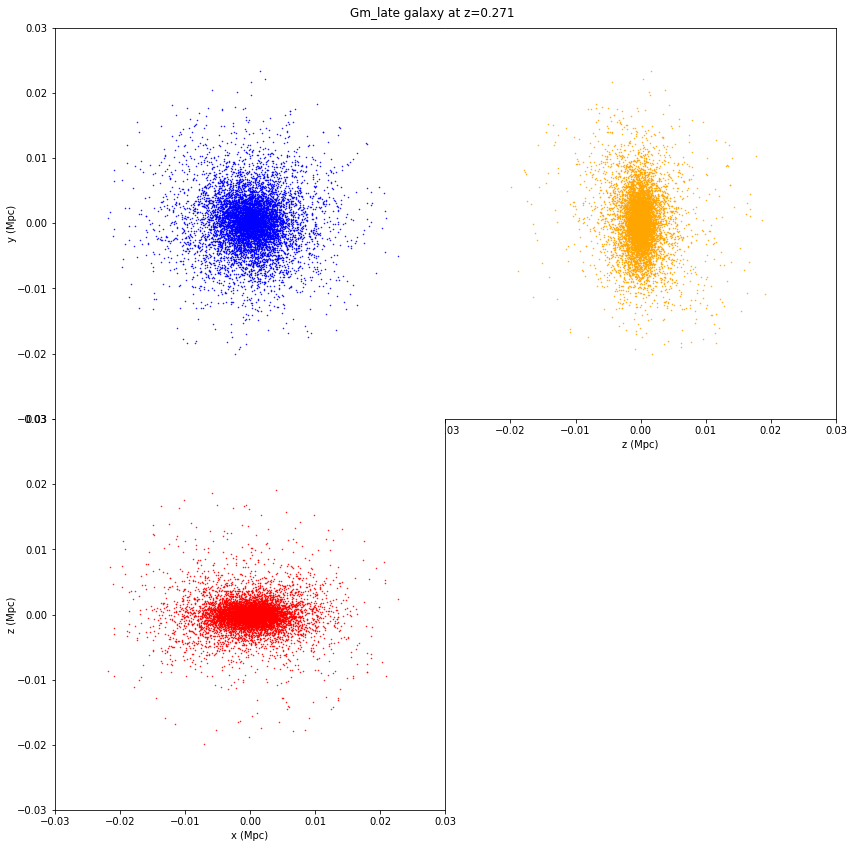

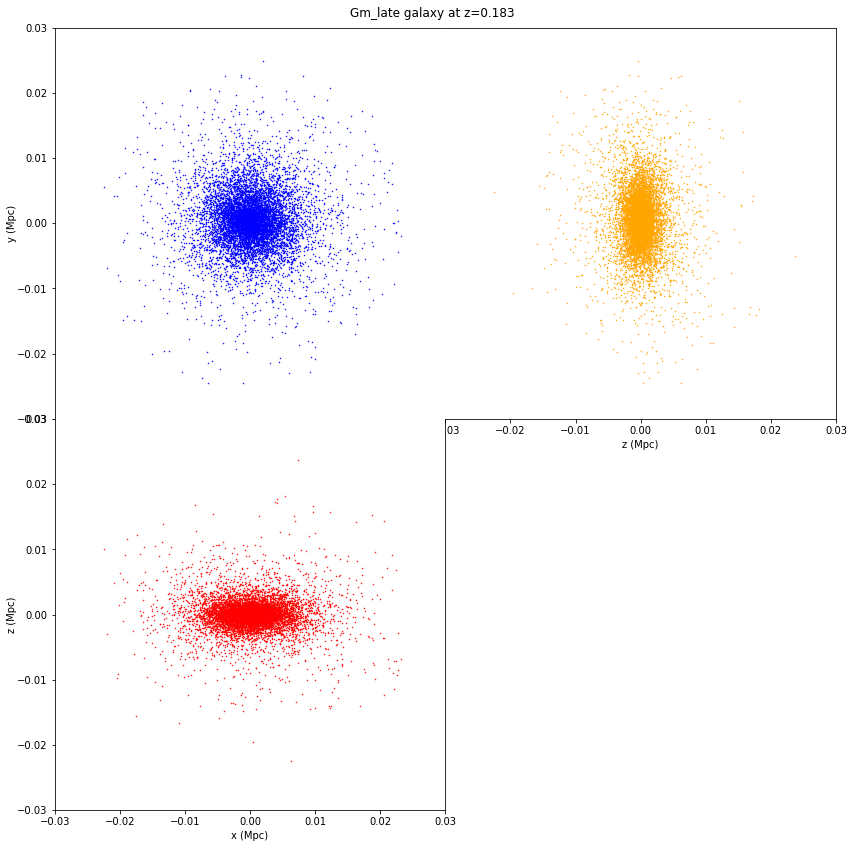

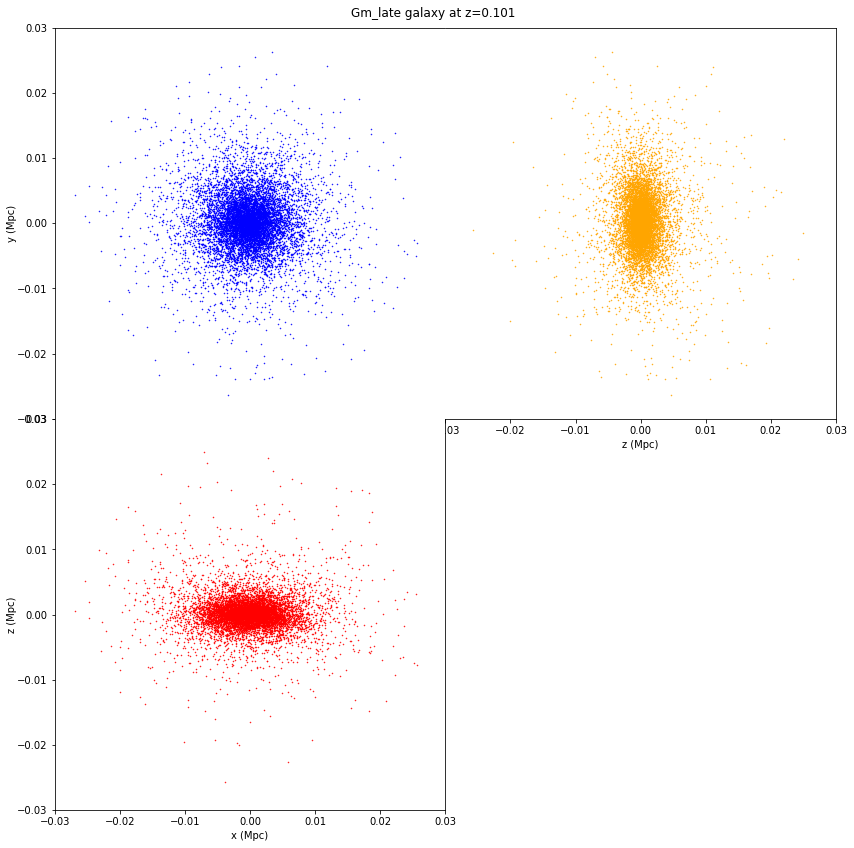

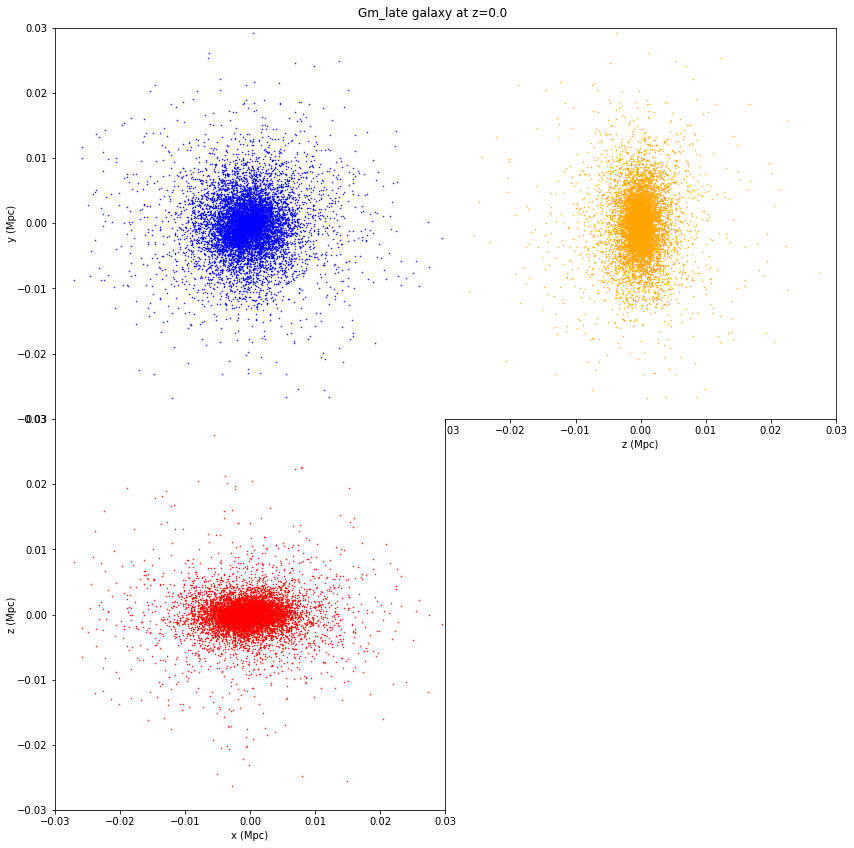

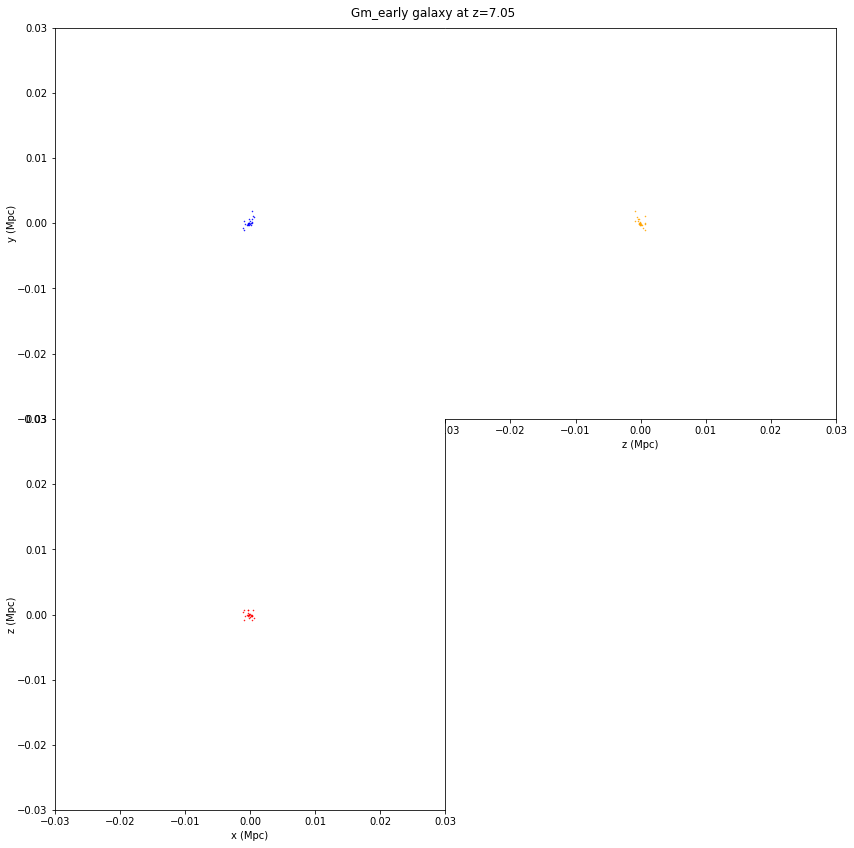

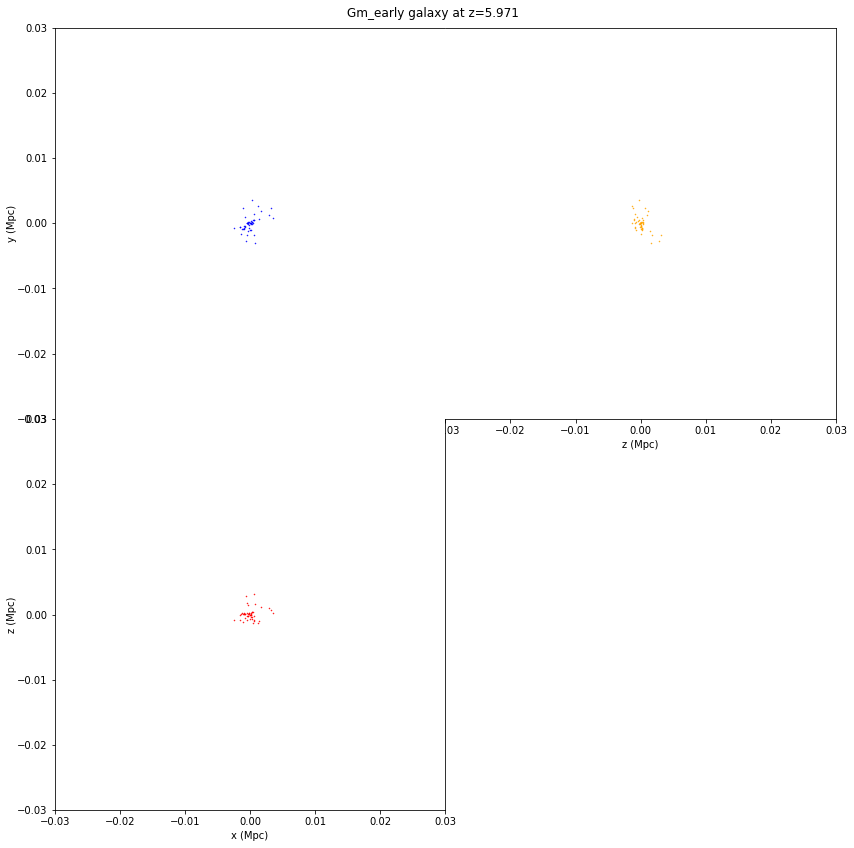

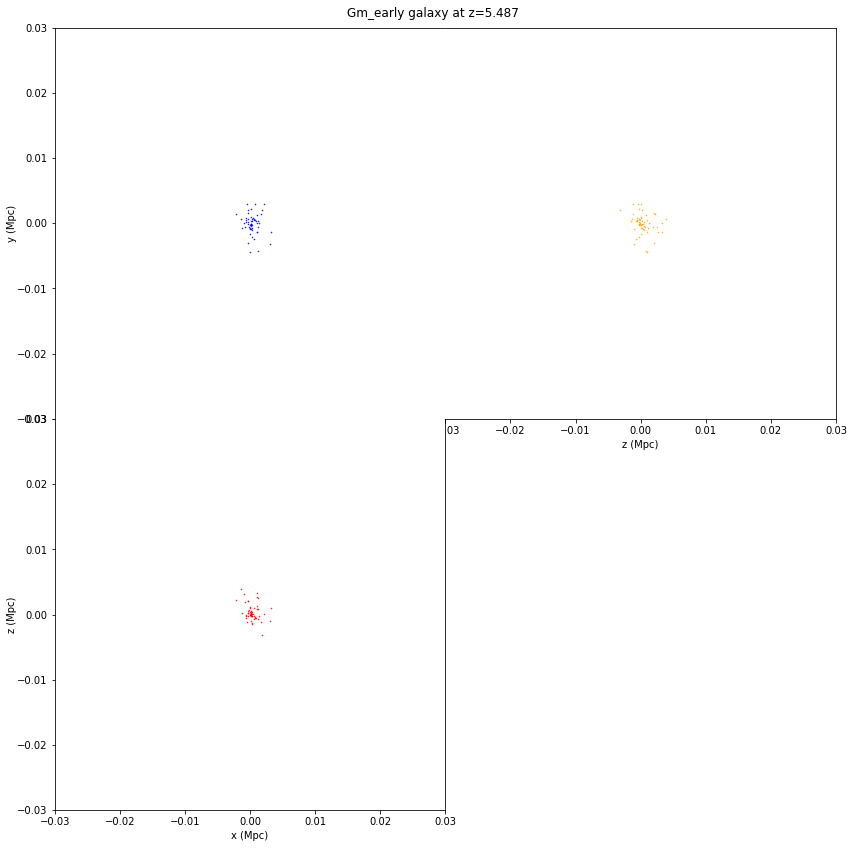

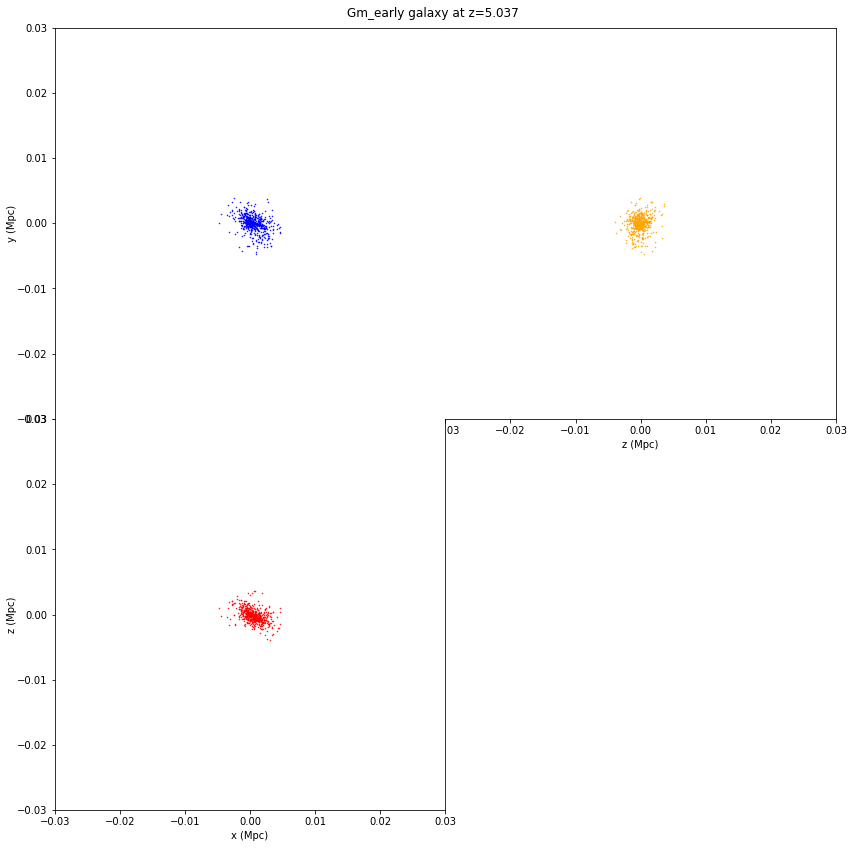

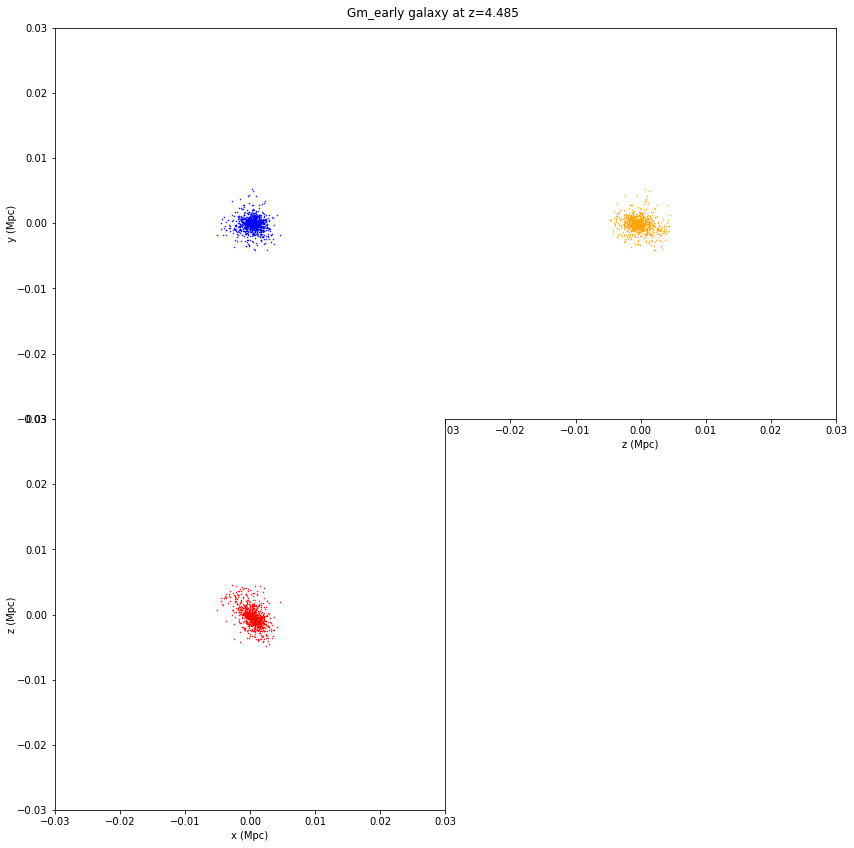

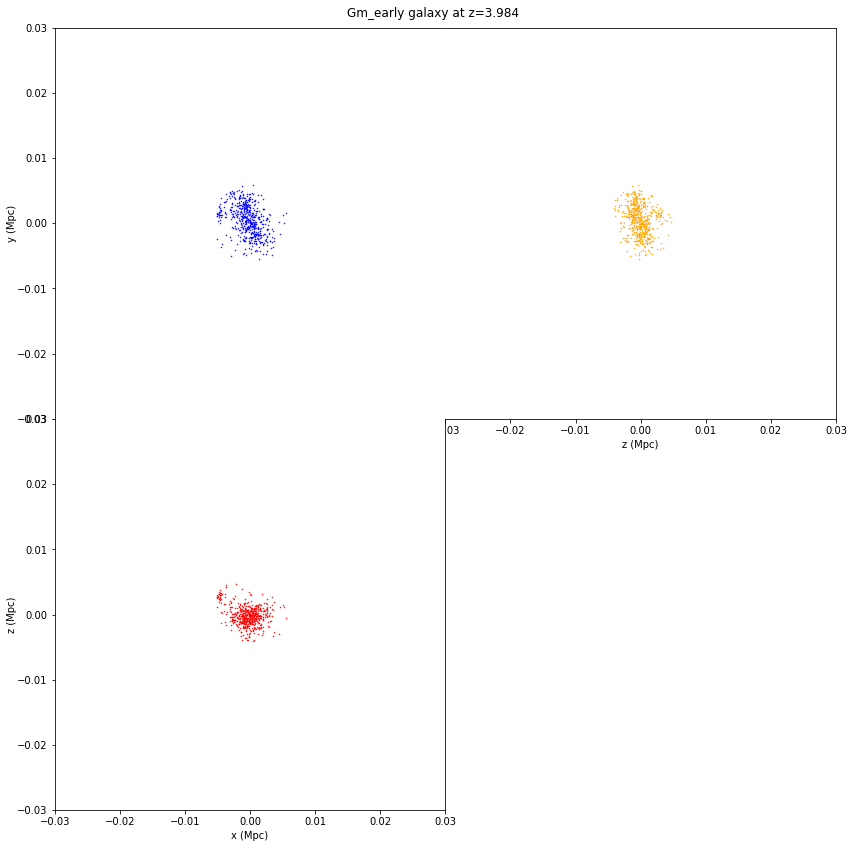

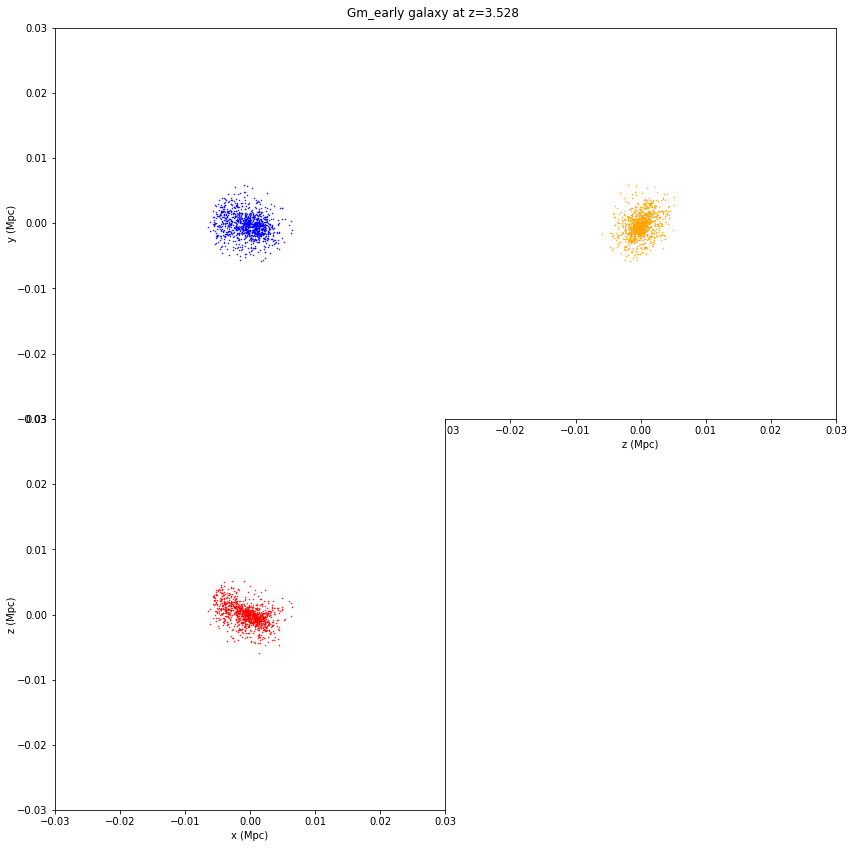

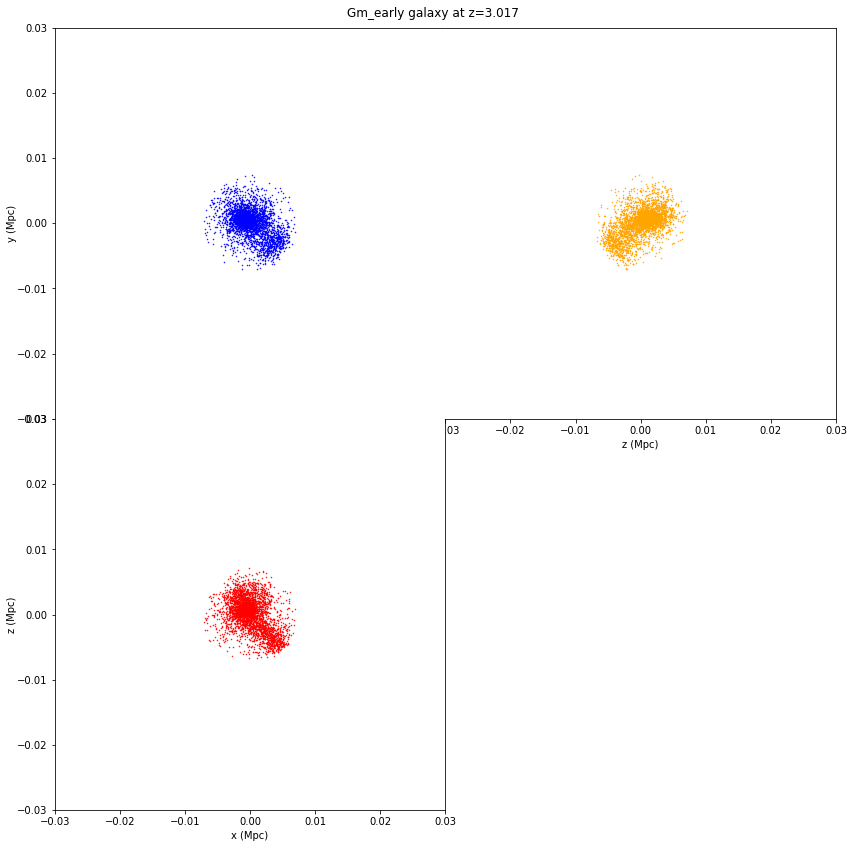

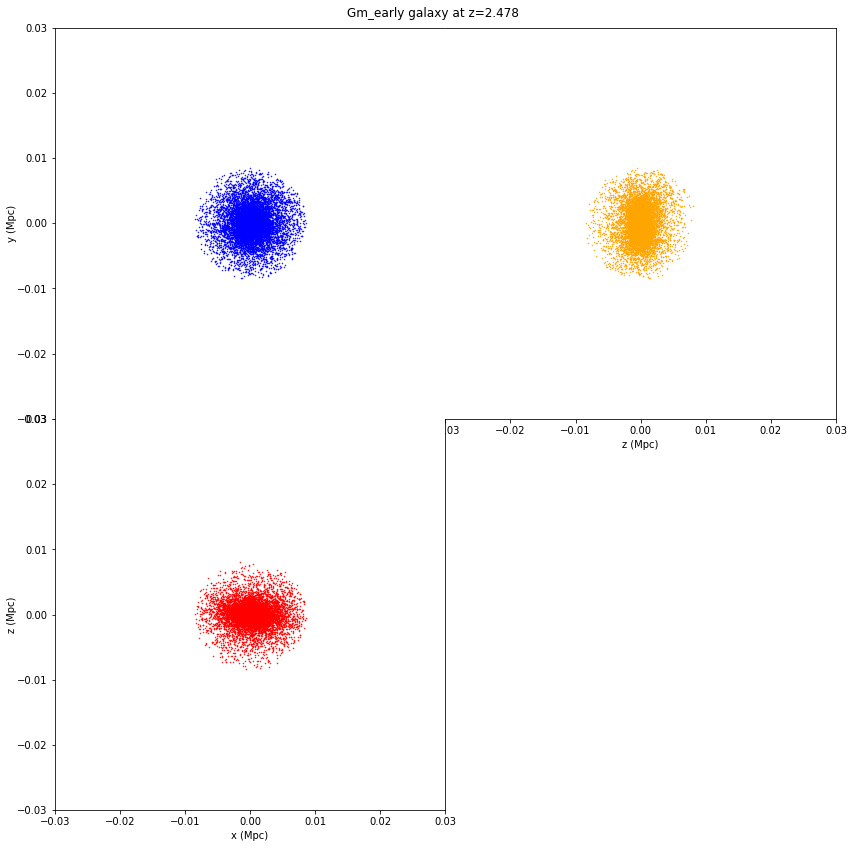

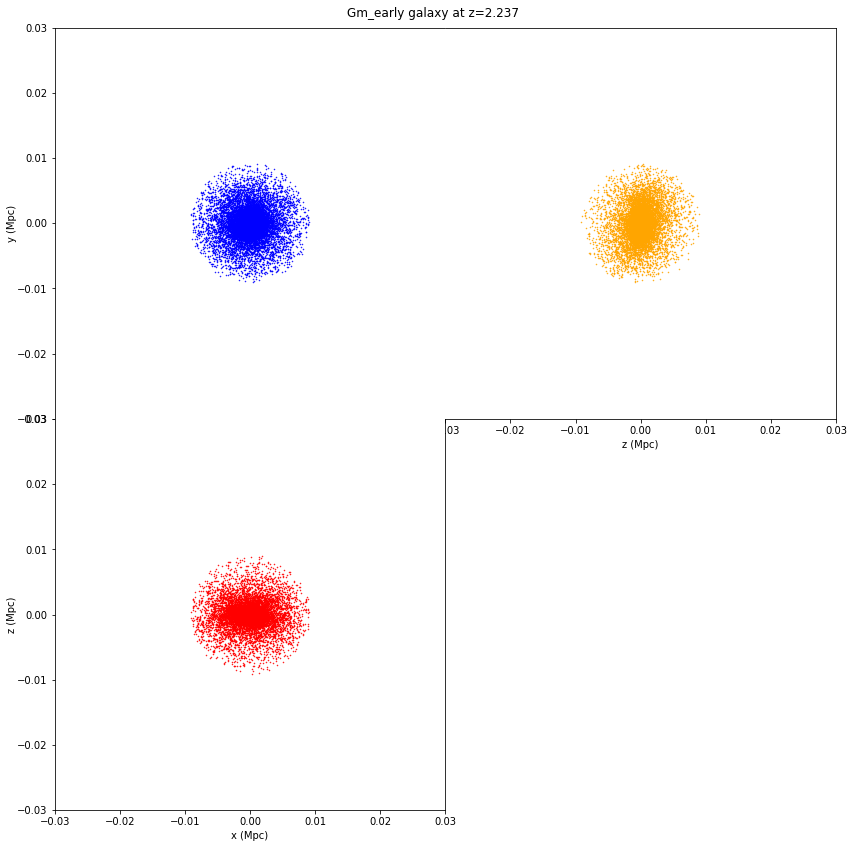

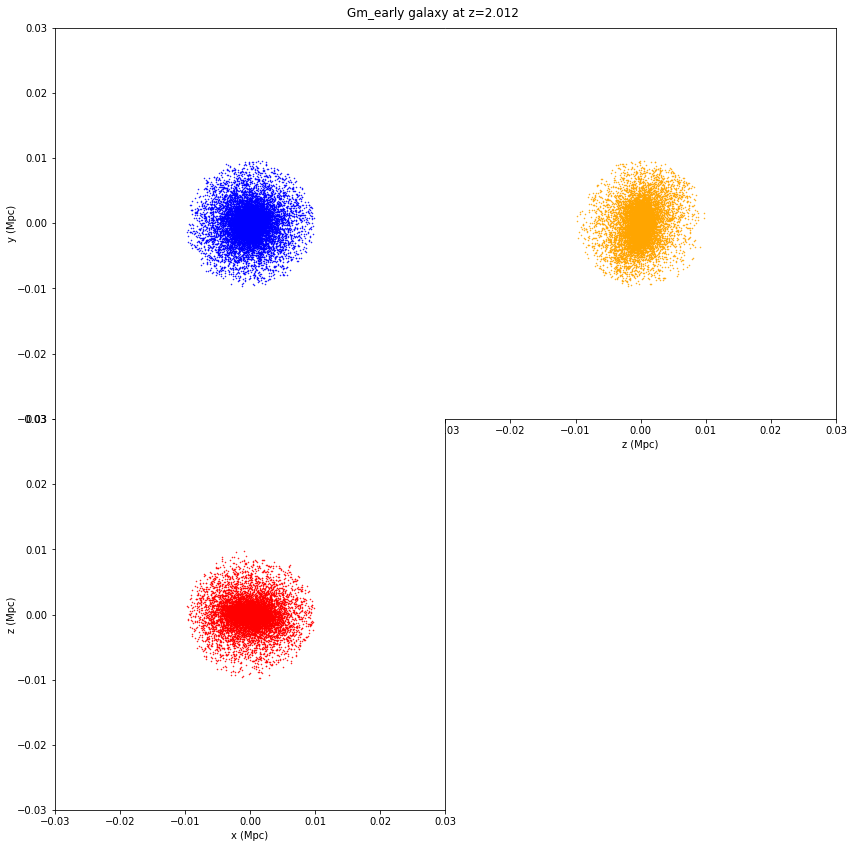

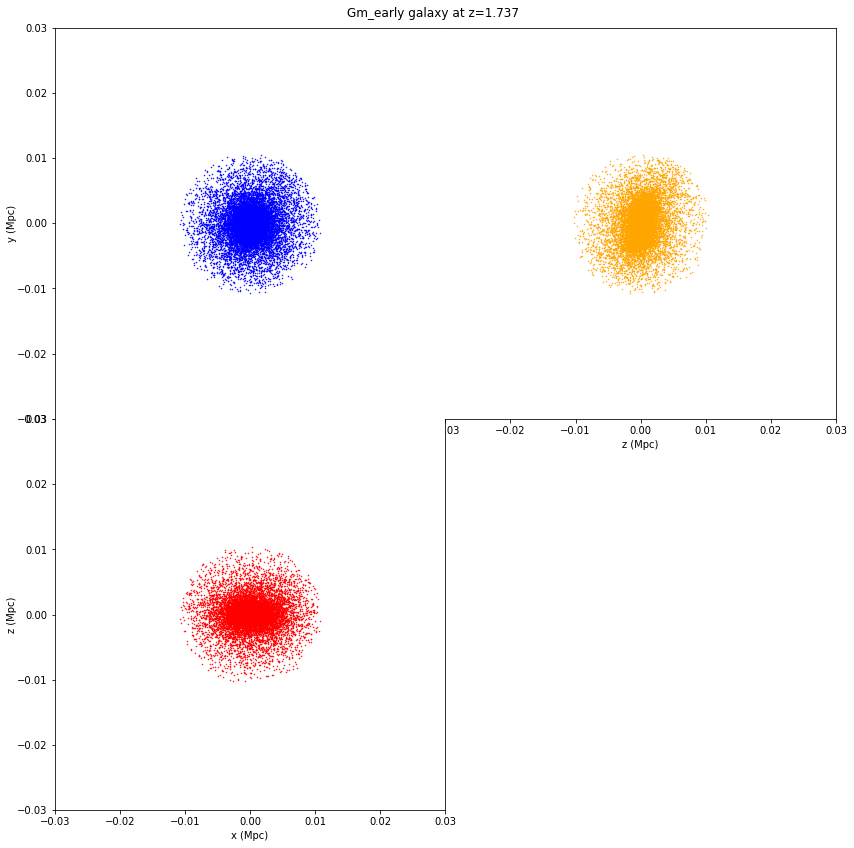

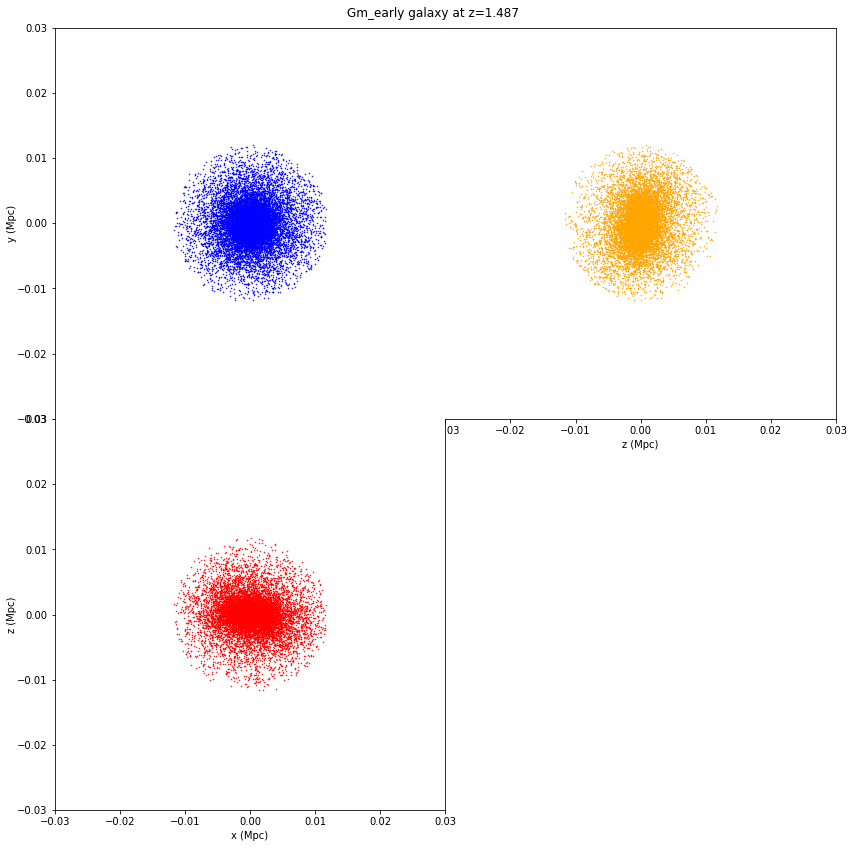

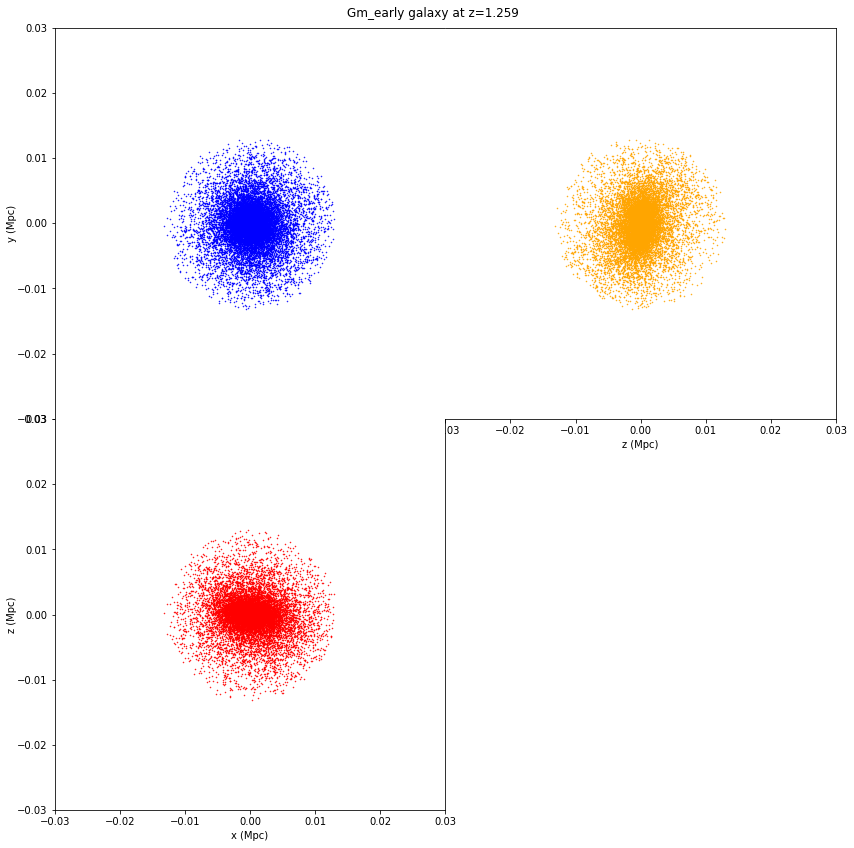

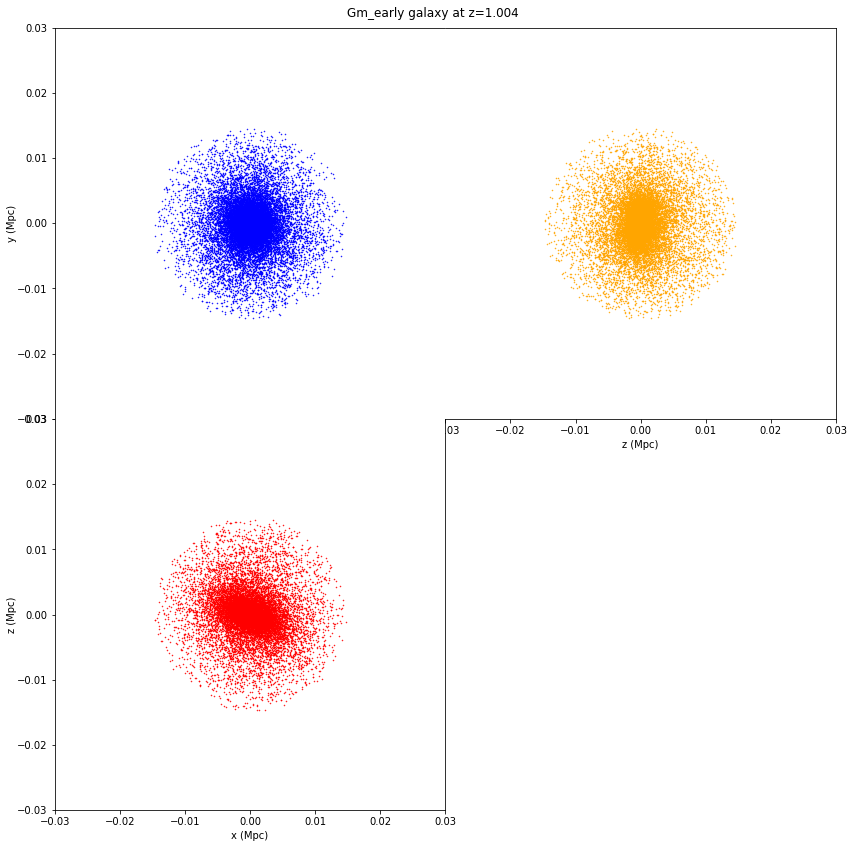

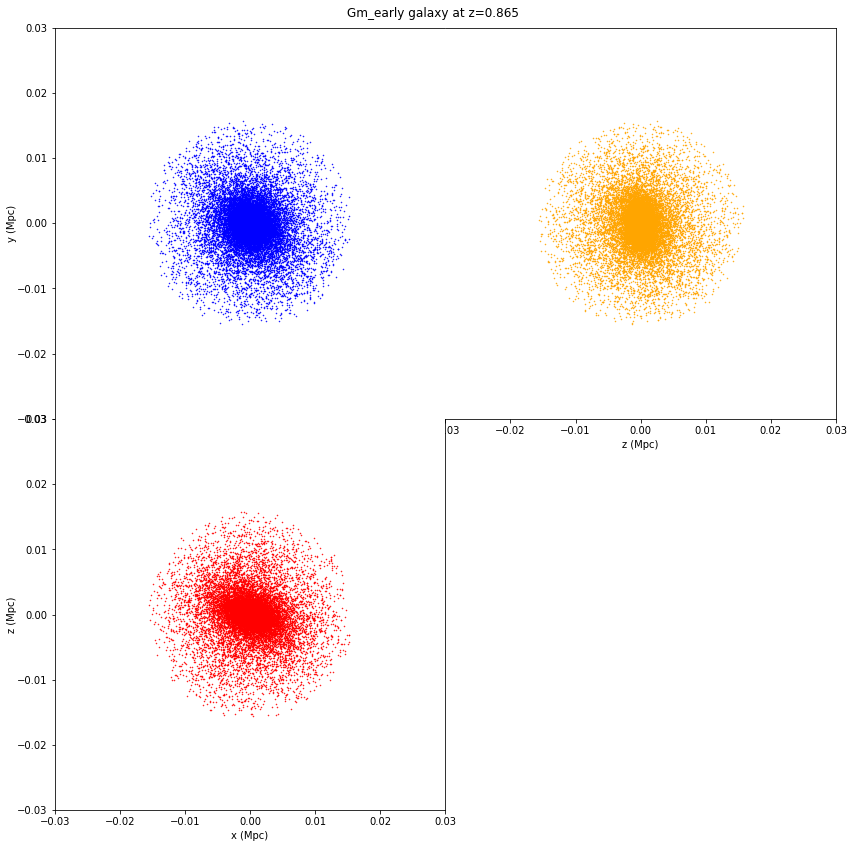

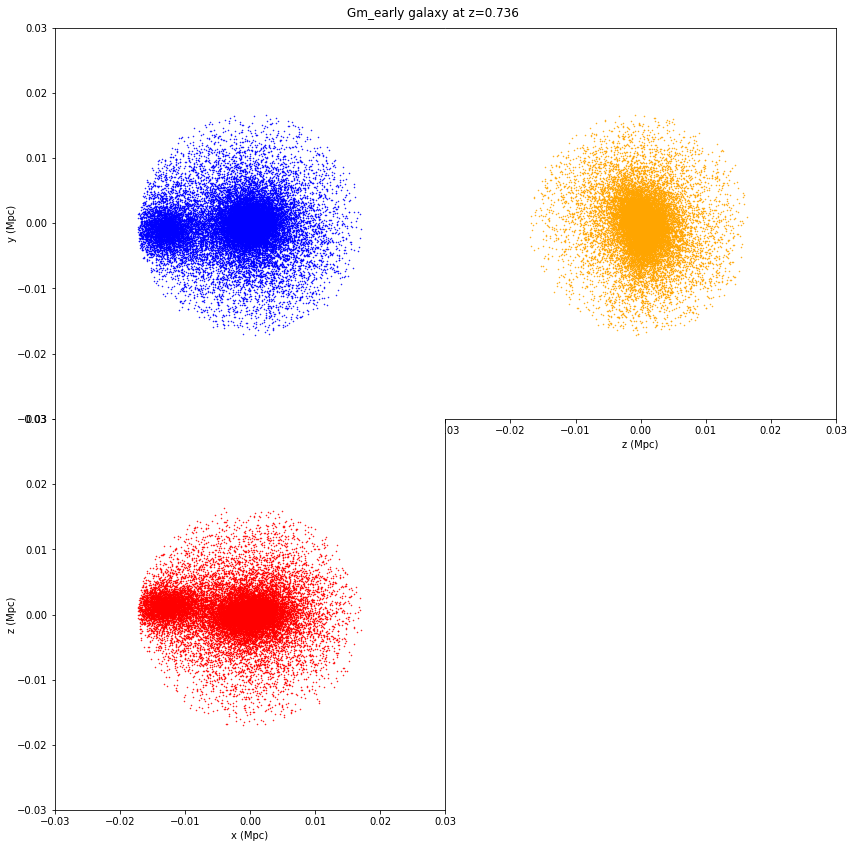

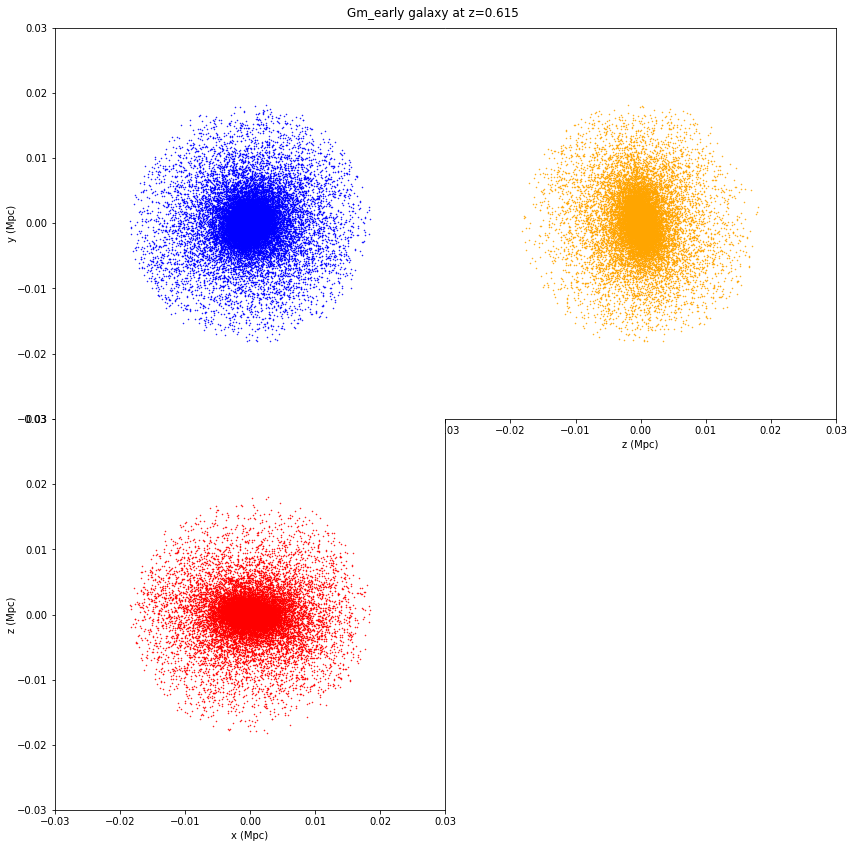

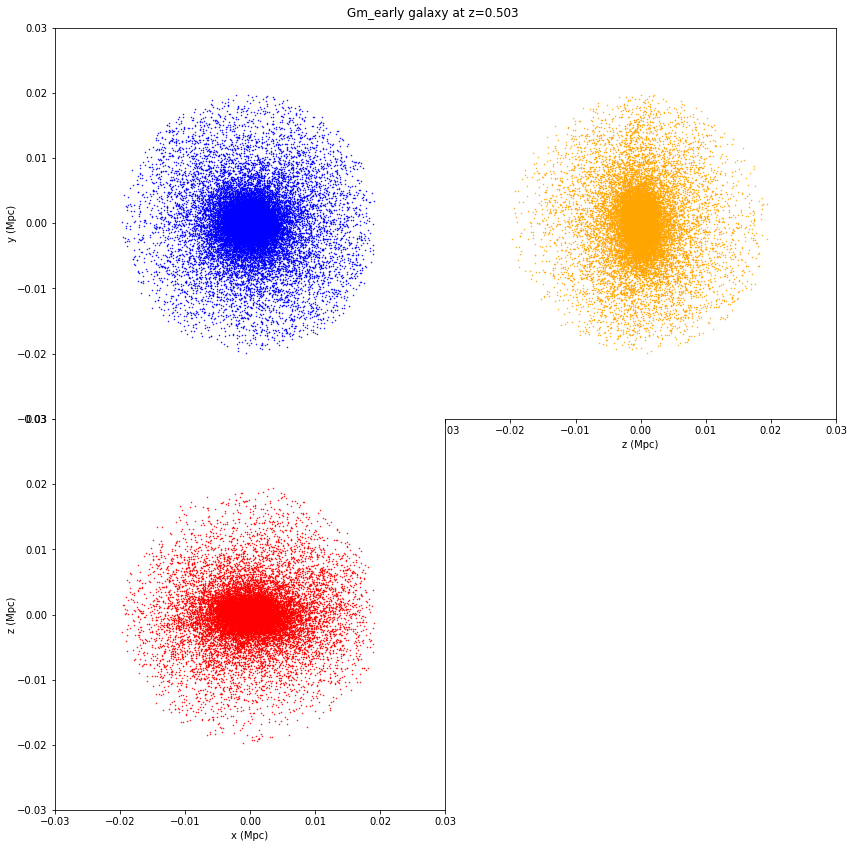

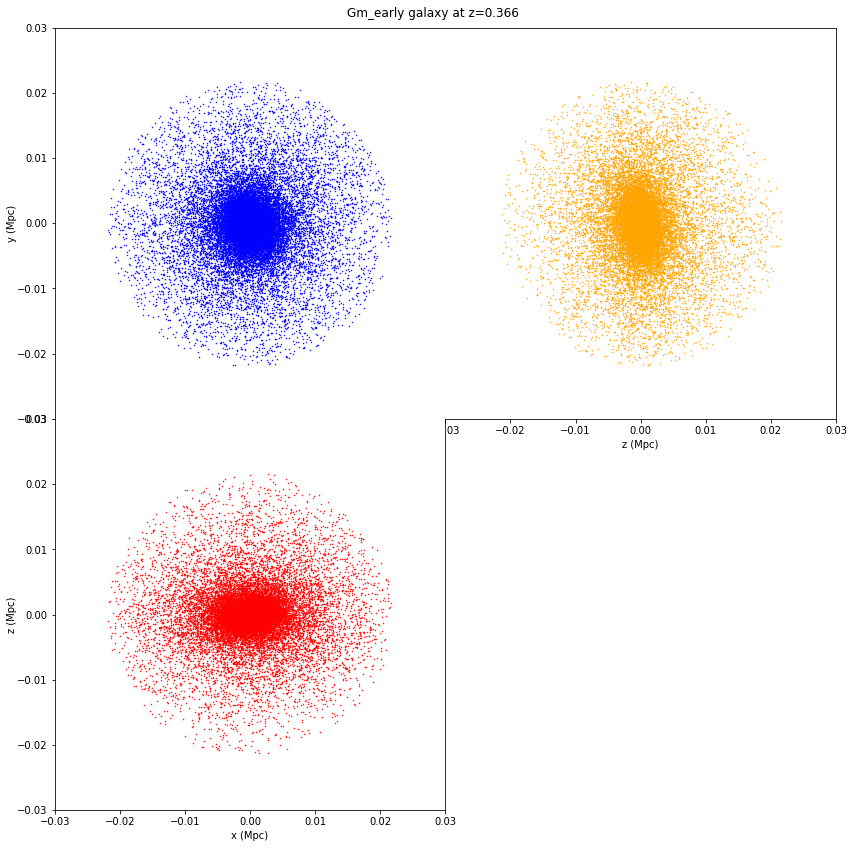

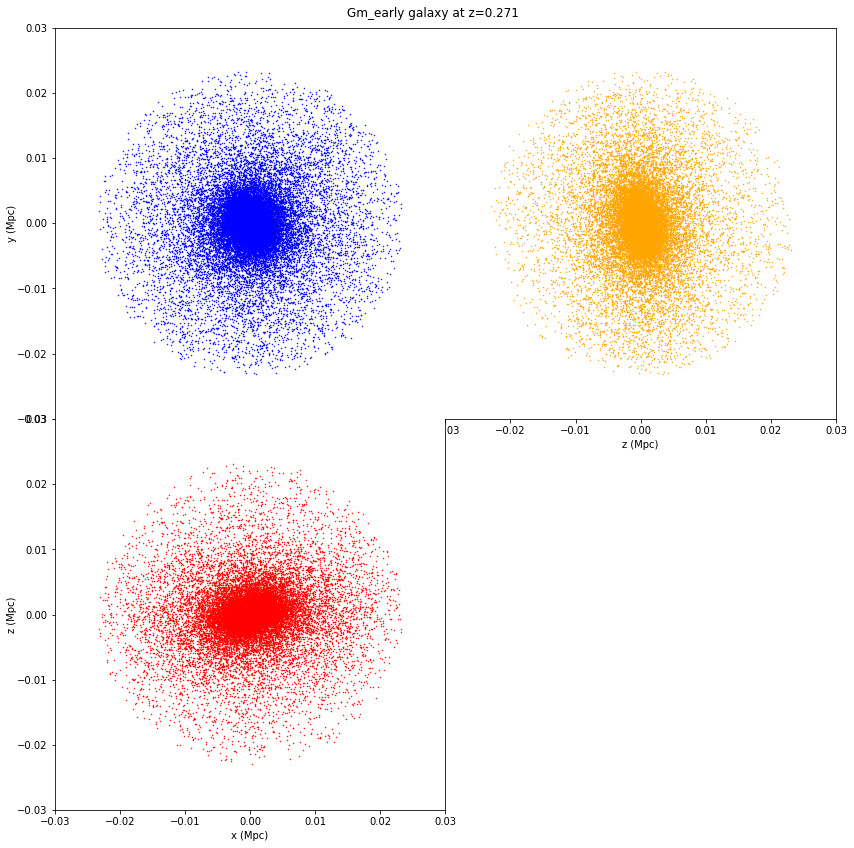

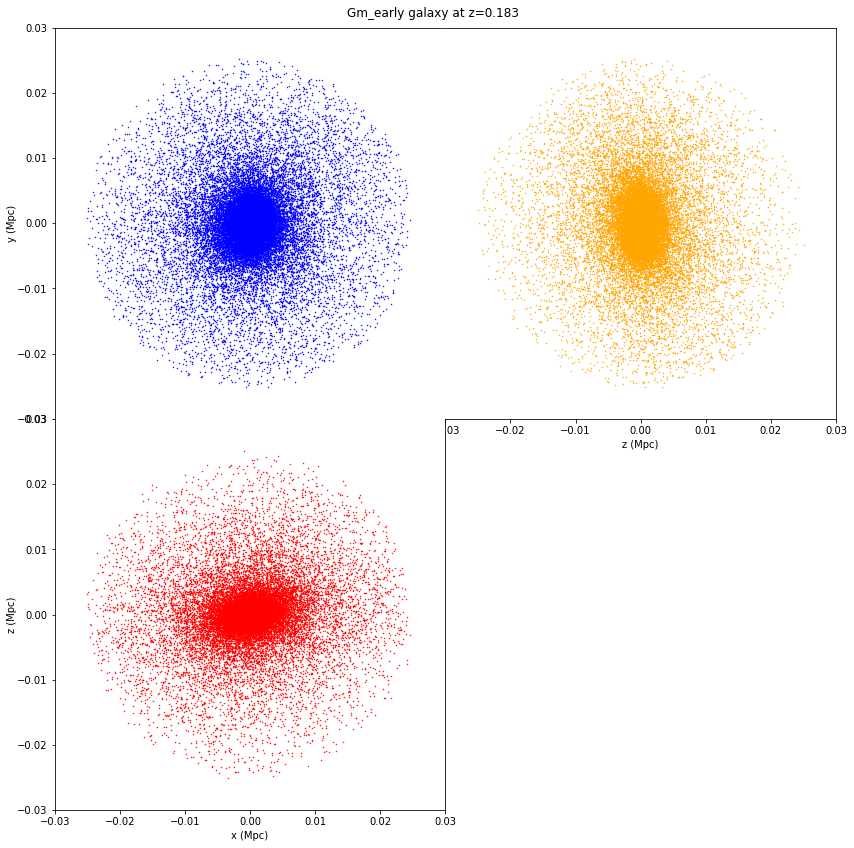

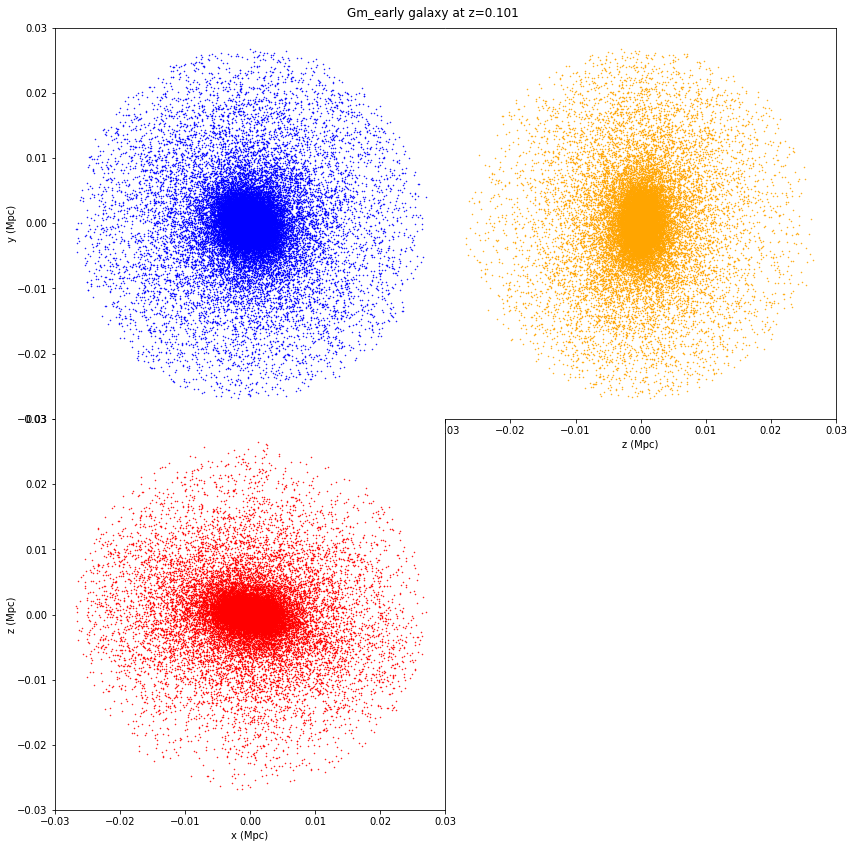

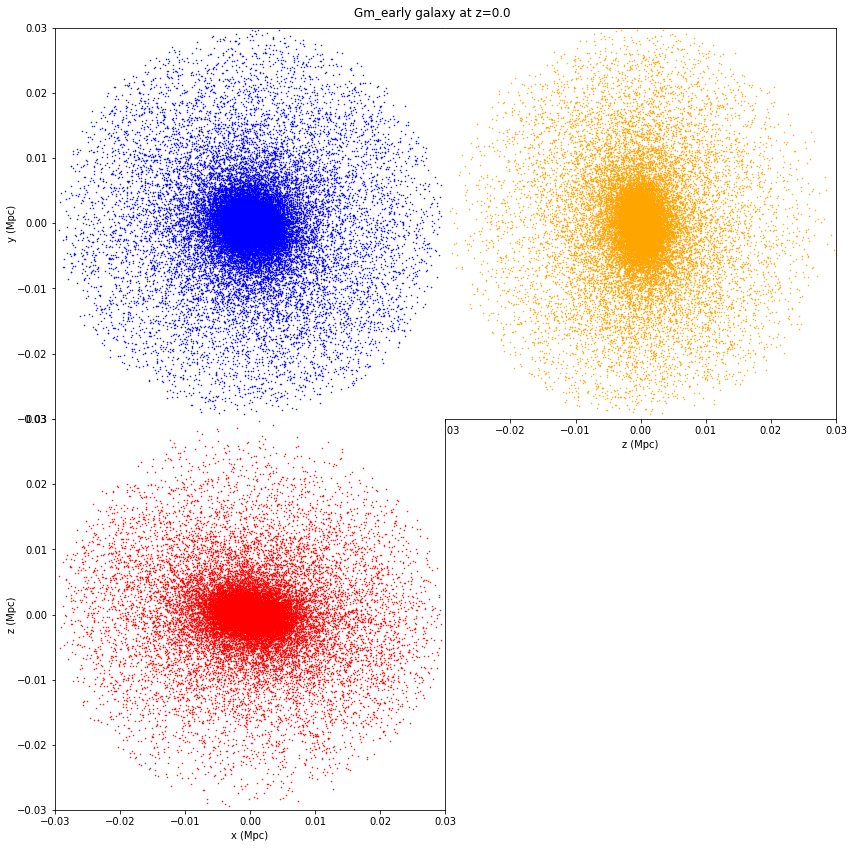

In [10]:
import h5py
import matplotlib.pyplot as plt
from os import listdir
from mpl_toolkits import mplot3d
import matplotlib.gridspec as gridspec
import numpy as np
import re

def LShapedPlot(dsc_x_trsfrm, dsc_y_trsfrm, dsc_z_trsfrm, axisScale, dataset, redshift, file, counter, figureSize, saveFrames):
    #plt.figure(figsize = (14,14.39))
    plt.figure(figsize = figureSize)



    gs = gridspec.GridSpec(2,2)
    gs.update(wspace=0, hspace=0)

    ax1 = plt.subplot(gs[0])
    ax1.xaxis.set_visible(False)
    ax1.set_ylabel('y (Mpc)', rotation=90, labelpad=0)
    ax1.set_aspect('equal')
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.set_xlim(left=-axisScale, right=axisScale)
    ax1.set_ylim(bottom=-axisScale, top=axisScale)
    ax1.plot(dsc_x_trsfrm, dsc_y_trsfrm, '.', color='blue', markersize=1)
    ax1.set_title = dataset + ' ' + file

    ax2 = plt.subplot(gs[1])
    ax2.yaxis.set_visible(False)
    ax2.set_xlabel('z (Mpc)', rotation=0)
    ax2.set_aspect('equal')
    ax2.spines['left'].set_visible(False)
    ax2.set_xlim(left=-axisScale, right=axisScale)
    ax2.set_ylim(bottom=-axisScale, top=axisScale)
    ax2.plot(dsc_z_trsfrm, dsc_y_trsfrm, '.', color='orange', markersize=1)

    ax3 = plt.subplot(gs[2])
    ax3.set_ylabel('z (Mpc)', rotation=90, labelpad=0)
    ax3.set_xlabel('x (Mpc)')
    ax3.set_aspect('equal')
    ax3.spines['top'].set_visible(False)
    ax3.set_xlim(left=-axisScale, right=axisScale)
    ax3.set_ylim(bottom=-axisScale, top=axisScale)
    ax3.plot(dsc_x_trsfrm, dsc_z_trsfrm, '.', color='red', markersize=1)

    ax4 = plt.subplot(gs[3], visible=False)
    ax4.set_aspect('equal')

    plt.suptitle(dataset.capitalize() + " galaxy at z=" + str(redshift), y=0.9)

    if saveFrames:
        plt.savefig('l-shaped_trnsfrm\\' + dataset + '\\plot' + str(counter) + '.png', dpi=300)
    else:
        plt.show()


# axis scale sets the maximum value on the axes
axisScale = 0.03

datasets = ['organic', 'gm_late', 'gm_early']

debug = False

for dataset in datasets:
    print('-----------------------------------------')
    print(dataset)
    print('-----------------------------------------')

    files = listdir('data/' + dataset)

    count = 0

    for file in files:

        # get redshift from the filename
        m = re.search('(z[0-9])\w+', file)
        s = m.group(0).replace('z', '')
        s = s.replace('p', '.')
        redshift = float(s)

        # load data for a particular galaxy at a particular redshift
        f = h5py.File('data/' + dataset + '/' + file,'r')

        # extract data from the file
        ds_c = f['Coordinates']
        ds_v = f['Velocity']
        ds_m = f['Mass']

        # Calculate the resultant angular momentum vectors angmom
        # angmom contains the AM vectors for each particle per redshift era
        mv = np.multiply(ds_m, np.transpose(ds_v))
        angMom = np.cross(ds_c, np.transpose(mv))

        # Get the vector norm to give the size of the vector, i.e.
        angMomTot = np.linalg.norm(angMom, axis=1)
        
        if debug: print ("shape r", np.shape(r))

        # Calculate the total angular momentum vector by summing the vectors (per redshift epoch)
        angMomTot = np.sum(r, axis=0)
        if debug: print ("shape angMomTot", np.shape(angMomTot)) 

        # Calculate the magnitude of the total angular momentum vector for each redshift epoch
        # We use this to normalise the angular momentum to a unit vector for scaling during the transform
        magnitude = np.linalg.norm(angMomTot)

        # Alternative way of calculating the magnitude
        # magnitude2 = np.sqrt(angMomTot[0]**2 + angMomTot[1]**2 + angMomTot[2]**2)

        # Convert the angular momentum vectors to a unit size - the other vectors will be based on this to prevent distortion
        unitVect_z = angMomTot / magnitude
        if debug: print ("unitVect_z", unitVect_z)
        if debug: print ("np.linalg.norm(unitVect_z)", np.linalg.norm(unitVect_z))


        # the angular momentum's vector's (unitVect_z) direction is directly out of the plane of the galaxy
        # unitVect_z = k, but j = [-k2/k1, 1, 0], so

        k = unitVect_z
        if debug: print ("k: ", k)

        j = [-k[1]/k[0], 1, 0]
        j = j/np.linalg.norm(j)
        if debug: print ("j: ", j)

        i = np.cross(j, unitVect_z)
        #i = j[1]*k[2] - j[2]*k[1], j[2]*k[0] - j[0]*k[2], j[0]*k[1] - j[1] * k[0]
        if debug: print ("i: ", i)

        if debug: print ("np.dot(i,j)", np.dot(i,j))
        if debug: print ("np.dot(i,k)", np.dot(i,k))
        if debug: print ("np.dot(j,k)", np.dot(j,k))

        dsc_x_trsfrm = np.dot(ds_c, i)
        if debug: print ("dsc_x_trsfrm", dsc_x_trsfrm)
        if debug: print ("dsc_x_trsfrm shape", np.shape(dsc_x_trsfrm))

        dsc_y_trsfrm = np.dot(ds_c, j)
        if debug: print ("dsc_y_trsfrm", dsc_y_trsfrm)
        if debug: print ("dsc_y_trsfrm shape", np.shape(dsc_y_trsfrm))

        dsc_z_trsfrm = np.dot(ds_c, k)
        if debug: print ("dsc_z_trsfrm", dsc_z_trsfrm)
        if debug: print ("dsc_z_trsfrm shape", np.shape(dsc_z_trsfrm))

        # Combine the separate x, y and z arrays into a single 3-vector array.  Transpose for ease of visualisation
        dsc_trans = np.transpose(np.array([dsc_x_trsfrm, dsc_y_trsfrm, dsc_z_trsfrm]))

        if debug: print ("dsc_trans", dsc_trans)
        if debug: print ("dsc_trans shape", np.shape(dsc_trans))   

        LShapedPlot(dsc_x_trsfrm, dsc_y_trsfrm, dsc_z_trsfrm, axisScale, dataset, redshift, file, count, (14,14.39), True)

        count = count + 1
        print ('-------------------------------------------------')